#### Importación de bibliotecas

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Carga de base de datos
Anuncios de inmuebles de alquiler turístico en las principales plataformas.

In [2]:
# Definir la paleta institucional (colocarla en una celda anterior si es necesario)
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", 
    "#E8F1F2", "#A67C52", "#F4A261", "#264653", 
    "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
    "#2A9D8F", "#6D597A", "#B5838D"
]


#### Conexión a MySQL

In [3]:
"""Conecta a MySQL, obtiene todas las tablas y las guarda como DataFrames en un diccionario."""

def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025', 'Tourist_Accommodation17032025'].


C:\Users\jodri\AppData\Local\Temp\ipykernel_22764\1189579851.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"
Se creó el dataframe "Tourist_Accommodation17032025"


## Exploración inicial

In [4]:
# se carga como df la TABLA MÁS RECIENTE
df = Tourist_Accommodation17032025
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


### Tamaño

In [5]:
df.shape

(18000, 35)

### Tipos de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 18000 non-null  int64  
 1   name                         17996 non-null  object 
 2   description                  17743 non-null  object 
 3   host_id                      18000 non-null  int64  
 4   neighbourhood_name           18000 non-null  object 
 5   neighbourhood_district       10941 non-null  object 
 6   room_type                    18000 non-null  object 
 7   accommodates                 18000 non-null  int64  
 8   bathrooms                    17866 non-null  object 
 9   bedrooms                     17872 non-null  object 
 10  beds                         17929 non-null  float64
 11  amenities_list               17968 non-null  object 
 12  price                        17552 non-null  float64
 13  minimum_nights  

#### Corrección de tipos de datos

In [7]:
# conversión a numérico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')

# conversión a booleano
df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
df['has_availability'] = df['has_availability'].astype(bool)

df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
df['is_instant_bookable'] = df['is_instant_bookable'].astype(bool)

# conversión a fechas
df["first_review_date"] = pd.to_datetime(df["first_review_date"], errors="coerce")
df["last_review_date"] = pd.to_datetime(df["last_review_date"], errors="coerce")
df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 18000 non-null  int64         
 1   name                         17996 non-null  object        
 2   description                  17743 non-null  object        
 3   host_id                      18000 non-null  int64         
 4   neighbourhood_name           18000 non-null  object        
 5   neighbourhood_district       10941 non-null  object        
 6   room_type                    18000 non-null  object        
 7   accommodates                 18000 non-null  int64         
 8   bathrooms                    17866 non-null  float64       
 9   bedrooms                     17872 non-null  float64       
 10  beds                         17929 non-null  float64       
 11  amenities_list               17968 non-nu

C:\Users\jodri\AppData\Local\Temp\ipykernel_22764\3580156214.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
C:\Users\jodri\AppData\Local\Temp\ipykernel_22764\3580156214.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
C:\Users\jodri\AppData\Local\Temp\ipykernel_22764\3580156214.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=Fals

### Duplicados

In [8]:
df.duplicated().sum()


8000

In [9]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 18000
Total de duplicados exactos: 8000
El número de apartment_id duplicados es: 8350


### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.28                 2.58     1.0       2.0      4.0      6.00     29.0
bathrooms                       1.60                 1.00     0.0       1.0      1.0      2.00     13.0
bedrooms                        1.94                 1.33     0.0       1.0      2.0      3.00     50.0
beds                            2.93                 2.27     0.0       1.0      2.0      4.00     30.0
price                        1025.74              1009.88    60.0     450.0    750.0   1240.00  28571.0
minimum_nights                  4.96                19.36     1.0       1.0      2.0      4.00   1125.0
maximum_nights                758.94               498.58     1.0      61.0   1125.0   1125.00   1125.0
availability_30                12.93                11.81     0.0       0.0     11.0     26.00     30.0
availability_60            

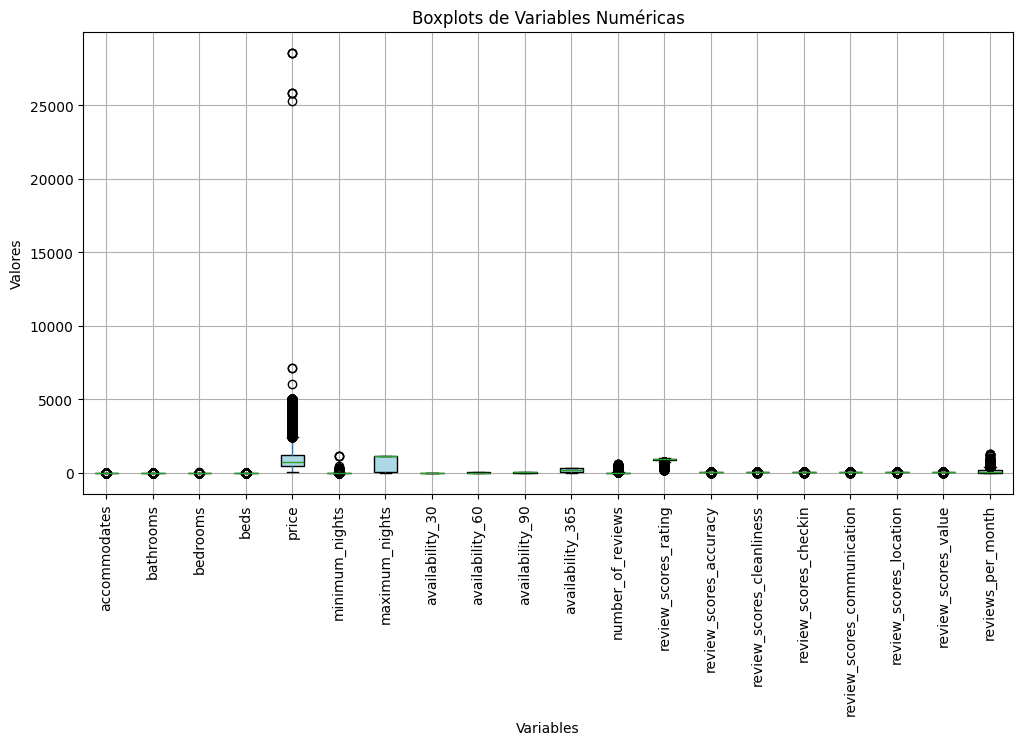

In [10]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

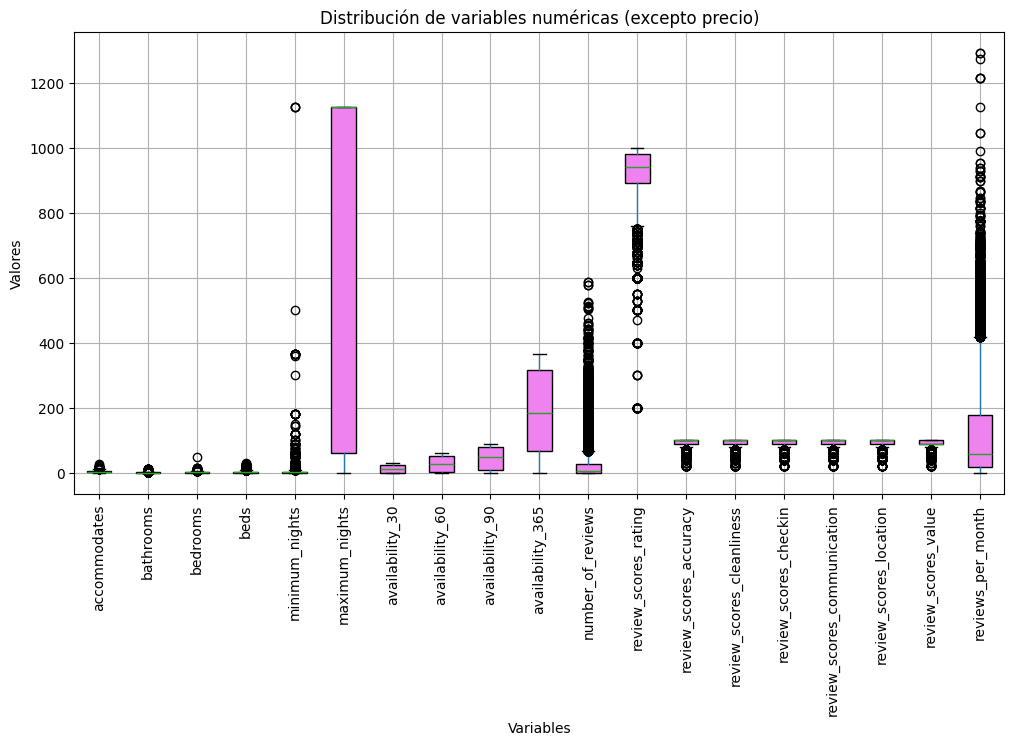

In [11]:
# nuevo gráfico sin precio para visualizar mejor las demás variables

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

## Limpieza de datos (Data Cleaning)

### Tratamiento de duplicados

In [12]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 18000
Total de duplicados exactos: 8000
El número de apartment_id duplicados es: 8350


In [13]:
# Filtar las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicados_filas.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,True,7,20,40,130,78,2010-02-01,2017-05-09,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,True,0,0,0,162,33,2014-10-10,NaT,920.0,90.0,90.0,100.0,100.0,80.0,90.0,False,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,True,26,31,31,270,148,2011-05-01,NaT,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,True,9,23,49,300,292,NaT,2020-04-01,940.0,100.0,90.0,100.0,100.0,100.0,90.0,True,306.0,spain,barcelona,2020-01-10
9,73683,Sagrada Familia area for 12 people,"An ideal location for a big group, two apartme...",135703,el Camp d'en Grassot i Gr�cia Nova,Gr�cia,Entire home/apt,12,2.0,4.0,14.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",3000.0,2,60,True,8,12,23,296,120,2011-04-06,NaT,920.0,90.0,90.0,100.0,100.0,90.0,90.0,True,14.0,spain,barcelona,2018-06-09
11,79755,3Br-2bath-AC Full 5 stars reviews!,"90 m2 apartment, 2 baths, 3 bedrooms. Fully eq...",429939,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,5,2.0,3.0,4.0,"TV,Internet,Wireless Internet,Air conditioning...",1100.0,3,365,True,9,10,10,10,189,NaT,2016-01-10,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,234.0,spain,barcelona,2017-12-09
13,89776,Modernist flat Downtown Casa Estap� | Barcelona,"Unique and rare ! Stay in the Casa Estap�, jew...",488151,el Fort Pienc,Eixample,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",650.0,3,365,True,7,18,41,224,322,2011-10-11,2019-01-12,960.0,100.0,100.0,100.0,100.0,100.0,100.0,True,327.0,spain,barcelona,2019-12-10
14,89954,Amazing apt in the historic center,"Beautiful, new, central and cosy apartment per...",487095,Palacio,Centro,Entire home/apt,6,1.0,2.0,3.0,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Elev...",1030.0,2,20,True,27,48,49,61,181,2011-01-07,2018-01-11,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,202.0,spain,madrid,2018-11-07
17,103386,"Central 2 Bedrooms, 3/5 pers. Wi-Fi","This is Edificio Palomar Apartments, I will tr...",508042,EL PILAR,CIUTAT VELLA,Entire home/apt,5,1.0,2.0,3.0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",840.0,1,14,True,17,38,64,229,13,2011-01-11,NaT,930.0,100.0,100.0,100.0,90.0,90.0,100.0,False,13.0,spain,valencia,2019-10-31
18,107437,A beautiful villa in Barcelona,"A conserved, period villa situated in the mids...",556626,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,8,2.0,5.0,6.0,"TV,Wifi,Kitchen,Free parking on premises,Smoki...",2200.0,3,120,True,12,41,59,250,34,2011-08-07,NaT,930.0,100.0,100.0,100.0,100.0,100.0,90.0,True,38.0,spain,barcelona,2018-10-10


Se decidió borrar solo los duplicados exactos y mantener los parciales (que son duplicados de la columna apartment_id) para que cada perfil decida cómo los tratará en su análisis.

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(10000, 35)

### Valores nulos

In [28]:
df.isnull().sum()

apartment_id                      0
name                              0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              6883
last_review_date               6901
review_scores_rating           2685
review_scores_accuracy         2694
review_scores_cleanliness      2688
review_scores_checkin          2699
review_scores_communication    2690
review_scores_location      

#### Eliminación de columnas irrelevantes

In [17]:
df = df.drop(columns=['description', 'country'])

#### Función de imputación de nulos

In [18]:
def imputación_desde_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo y completa sus valores faltantes 
    con los del más reciente SIN eliminar registros.
    Devuelve el df con valores actualizados y un resumen de los cambios.
    """

    df = df.copy()  # no modifica el df original
    resumen = []

    # filtra solo duplicadas por id_col
    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena (más antiguo primero)
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores faltantes en el registro antiguo
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si hubo cambios, se guarda en el resumen
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro reciente": latest_index,
                    "columnas actualizadas": actualizacion
                })

    # convierte el resumen en df
    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df, resumen_cambios = imputación_desde_duplicados(df, id_col='apartment_id', date_col='insert_date')

#### Neighbourhood_district

In [19]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

#### Características numéricas del alojamiento
Se sustituyen los nulos por 1, bajo el entendido de que en todos los alojamientos por defecto hay 1 cama, 1 baño y aloja a al menos a 1 persona.

In [20]:
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

#### Precio

In [21]:
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

#### Columnas de texto

In [22]:
df["name"].fillna("Desconocido", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

C:\Users\jodri\AppData\Local\Temp\ipykernel_22764\1815731930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["name"].fillna("Desconocido", inplace=True)


#### Verificación

In [23]:
df.isnull().sum()

apartment_id                      0
name                              0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              6883
last_review_date               6901
review_scores_rating           2685
review_scores_accuracy         2694
review_scores_cleanliness      2688
review_scores_checkin          2699
review_scores_communication    2690
review_scores_location      

El df resultante tiene únicamente nulos en las variables relativas a las reseñas, lo cual es esperable, ya que no todos los avisos tendrán reseñas.

## Transformación de Datos (Data Transformation)

In [24]:
# Definir las columnas numéricas sobre las que calcular la media
# columnas_media = ["availability_30", "availability_60", "availability_90", "availability_365"]

# # Agrupar por 'apartment_id' y calcular la media de las columnas seleccionadas
# df_agrupado = df.groupby("apartment_id", as_index=False)[columnas_media].mean()

# # Mostrar el resultado
# # Si usas Jupyter Notebook, puedes usar display() para mejor visualización
# from IPython.display import display
# display(df_agrupado)

In [25]:
# print(df_agrupado[df_agrupado['apartment_id'] == 343864])

In [26]:
# df_agrupado.duplicated().sum()

In [50]:
bins = [0, 50, 100, 200, 500, 1000, float('inf')]  # Define bins
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Luxury']
df['price'] = pd.cut(df['price'], bins=bins, labels=labels)

TypeError: '<' not supported between instances of 'float' and 'str'

In [26]:
freq_table = pd.crosstab(df['price'], df['review_scores_rating'])
freq_table

review_scores_rating,200.0,300.0,400.0,470.0,500.0,530.0,550.0,600.0,630.0,640.0,650.0,660.0,670.0,680.0,690.0,700.0,710.0,720.0,730.0,740.0,750.0,760.0,770.0,780.0,790.0,800.0,810.0,820.0,830.0,840.0,850.0,860.0,870.0,880.0,890.0,900.0,910.0,920.0,930.0,940.0,950.0,960.0,970.0,980.0,990.0,1000.0
price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
80.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
90.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
100.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,3
110.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,3
120.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,3,1,1,1,0,1,1,1,3,0,1,0,2,3,2,0,1,0,1,0,7
5043.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6071.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


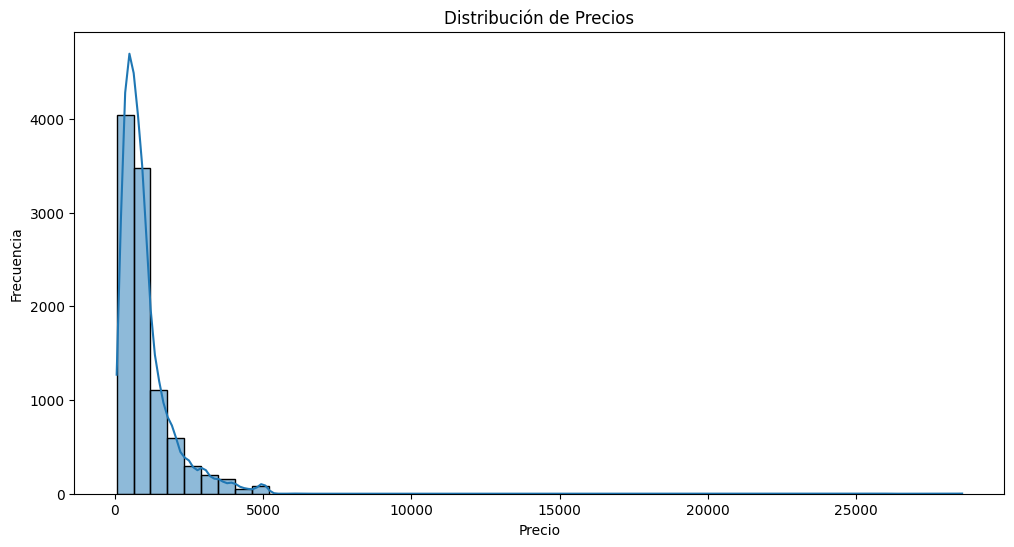

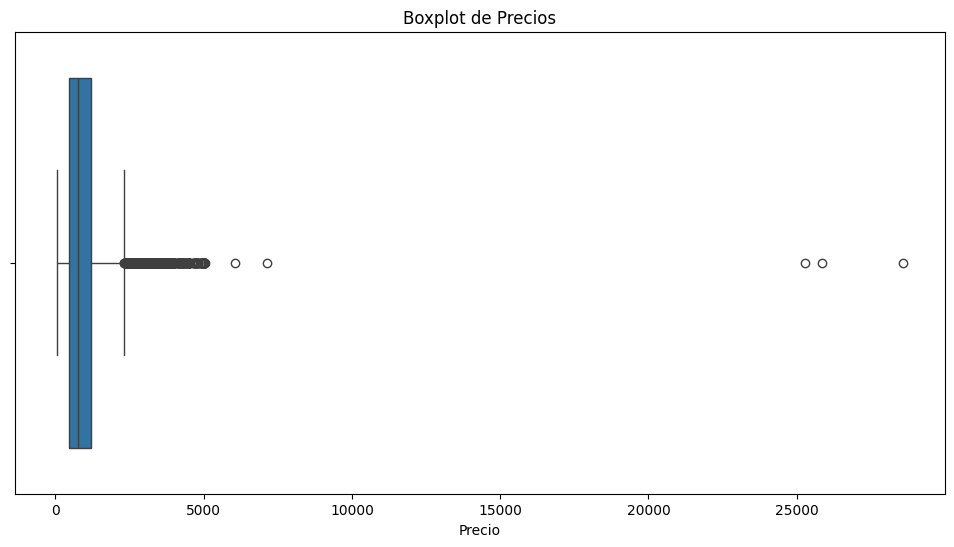

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma con KDE para ver la distribución de precios
plt.figure(figsize=(12, 6))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot para ver outliers y dispersión
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["price"])
plt.title("Boxplot de Precios")
plt.xlabel("Precio")
plt.show()


In [26]:
df["price"].describe()


count    10000.000000
mean      1017.334800
std        963.365922
min         60.000000
25%        450.000000
50%        750.000000
75%       1200.000000
max      28571.000000
Name: price, dtype: float64

In [27]:
df["price"].value_counts(bins=10).sort_index()


(31.488, 2911.1]      9505
(2911.1, 5762.2]       490
(5762.2, 8613.3]         2
(8613.3, 11464.4]        0
(11464.4, 14315.5]       0
(14315.5, 17166.6]       0
(17166.6, 20017.7]       0
(20017.7, 22868.8]       0
(22868.8, 25719.9]       1
(25719.9, 28571.0]       2
Name: count, dtype: int64

In [30]:
bins = [0, 500, 1000, 2000, 4000, 8000, df["price"].max()]
labels = ["Económico", "Accesible", "Medio", "Alto", "Premium", "Exclusivo"]

df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels, right=True)

df["price_category"].value_counts()


price_category
Accesible    3737
Económico    3096
Medio        2166
Alto          862
Premium       136
Exclusivo       3
Name: count, dtype: int64

In [31]:
bins = [0, 450, 750, 1200, 3000, 10000, df["price"].max()]
labels = ["Económico", "Accesible", "Medio", "Alto", "Premium", "Exclusivo"]

df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels, right=True)

df["price_category"].value_counts()


price_category
Económico    2560
Medio        2481
Accesible    2472
Alto         2089
Premium       395
Exclusivo       3
Name: count, dtype: int64

In [32]:
import numpy as np

# Calculamos los percentiles clave
percentiles = np.percentile(df["price"], [20, 40, 60, 80, 99])
bins = [df["price"].min()] + list(percentiles) + [df["price"].max()]

# Definimos etiquetas
labels = ["Económico", "Accesible", "Medio", "Alto", "Premium", "Exclusivo"]

# Aplicamos la categorización
df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels, right=True)

# Revisamos la nueva distribución
print(df["price_category"].value_counts())


price_category
Económico    2198
Medio        2002
Alto         2001
Premium      1901
Accesible    1807
Exclusivo      90
Name: count, dtype: int64


In [33]:
df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels, right=True)


In [34]:
df.groupby("price_category")["price"].describe()


C:\Users\jodri\AppData\Local\Temp\ipykernel_13568\3865989673.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("price_category")["price"].describe()


,count,mean,std,min,25%,50%,75%,max
price_category,,,,,,,,
Económico,2198.0,286.842584,80.889140,80.0,230.0,300.0,350.0,400.0
Accesible,1807.0,523.265080,60.516126,410.0,480.0,510.0,590.0,620.0
Medio,2002.0,765.329670,83.886815,630.0,700.0,750.0,840.0,910.0
Alto,2001.0,1110.634683,146.000846,920.0,990.0,1090.0,1200.0,1430.0
Premium,1901.0,2278.152025,757.493699,1440.0,1680.0,2000.0,2750.0,4500.0
Exclusivo,90.0,5688.122222,3919.156249,4510.0,4907.5,5000.0,5000.0,28571.0


C:\Users\jodri\AppData\Local\Temp\ipykernel_13568\710280250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["price_category"], order=labels, palette="viridis")


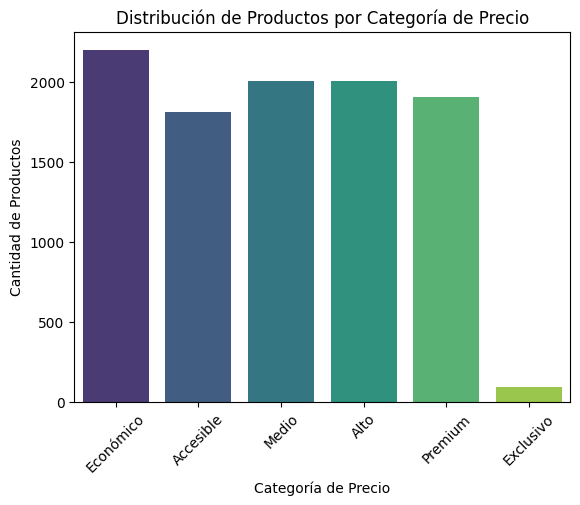

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["price_category"], order=labels, palette="viridis")
plt.title("Distribución de Productos por Categoría de Precio")
plt.xlabel("Categoría de Precio")
plt.ylabel("Cantidad de Productos")
plt.xticks(rotation=45)
plt.show()


In [36]:
import numpy as np

# Calculamos los valores de corte para cada percentil
percentiles = [10, 30, 50, 70, 90, 99]  # Ejemplo de percentiles
cut_values = np.percentile(df["price"], percentiles)

# Mostramos los valores de corte
for p, v in zip(percentiles, cut_values):
    print(f"Percentil {p}: {v:.2f}")


Percentil 10: 290.00
Percentil 30: 500.00
Percentil 50: 750.00
Percentil 70: 1090.00
Percentil 90: 2010.00
Percentil 99: 4500.00


In [39]:
import numpy as np
import pandas as pd

# Eliminar la columna si ya existe
if "price_category" in df.columns:
    df = df.drop(columns=["price_category"])

# Definir los percentiles de corte
percentiles = [10, 30, 50, 70, 90, 99]
cut_values = np.percentile(df["price"], percentiles)

# Convertimos los valores en una lista y añadimos los extremos
bins = [-np.inf] + list(cut_values) + [np.inf]

# Creamos las etiquetas dinámicamente evitando problemas con infinito
labels = []
for i in range(len(bins) - 1):
    lower = bins[i]
    upper = bins[i + 1]

    # Si lower es -inf, lo representamos como "Mínimo"
    if lower == -np.inf:
        label = f"<= {round(upper)}"
    # Si upper es inf, lo representamos como "Máximo"
    elif upper == np.inf:
        label = f"> {round(lower)}"
    else:
        label = f"{round(lower)}-{round(upper)}"

    labels.append(label)

# Aplicamos la categorización con los nombres de los rangos
df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels, right=True)

# Mostramos la cantidad de registros por categoría
print(df["price_category"].value_counts())


price_category
290-500      2045
750-1090     1989
1090-2010    1981
500-750      1936
<= 290       1051
2010-4500     908
> 4500         90
Name: count, dtype: int64


## Reducción de Datos (Data Reduction)

## Fin de la limpieza - Dataset limpio

# EDA Inventario - Inicio

## **Rol**: Operaciones y gestión de inventario

## **Objetivo de negocio:** Supervisar la disponibilidad, ocupacción y operaciones eficientes de los alojamientos

## **Pregunta de Negocio**: ¿Como afecta el número de habitaciones, baños y camas disponibles en la disponibilidad media de los alojamientos? Difiere entre ciudades?

## Limpieza y N

In [27]:
df.duplicated().sum()

registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 10000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 350


Decidimos trabajar con N = 10.000 debido a que cuantos mas datos (observaciones) tengamos mejor para responder la pregunta de negocio. No observamos una incompatibilidad al dejar mas de una observación de la misma propiedad. 

## Exploración Variables de Pregunta de Negocio

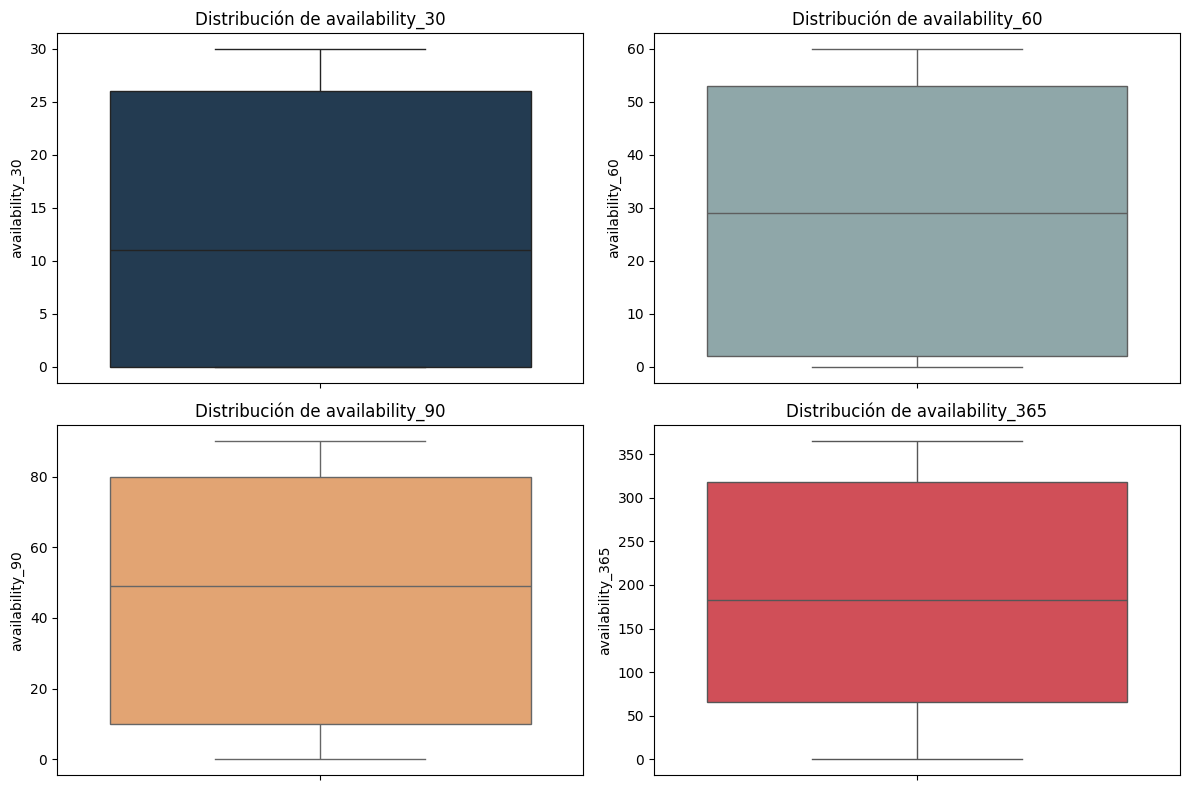

In [28]:
# Seleccionar 4 colores distintos para los boxplots
colores_seleccionados = [paleta[0], paleta[2], paleta[6], paleta[10]]  # Azul profundo, Azul grisáceo, Naranja suave, Rojo coral

availability_cols = ["availability_30", "availability_60", "availability_90", "availability_365"]

# Crear la figura con subgráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Recorrer las columnas y asignarlas a los subgráficos
for i, col in enumerate(availability_cols):
    row, col_idx = divmod(i, 2)  # Calcular posición en la cuadrícula
    sns.boxplot(y=df[col], ax=axes[row, col_idx], color=colores_seleccionados[i])  # Aplicar color de la paleta  # Crear boxplot
    axes[row, col_idx].set_title(f'Distribución de {col}')  # Agregar título

# Ajustar diseño para evitar superposición
plt.tight_layout()
plt.show()

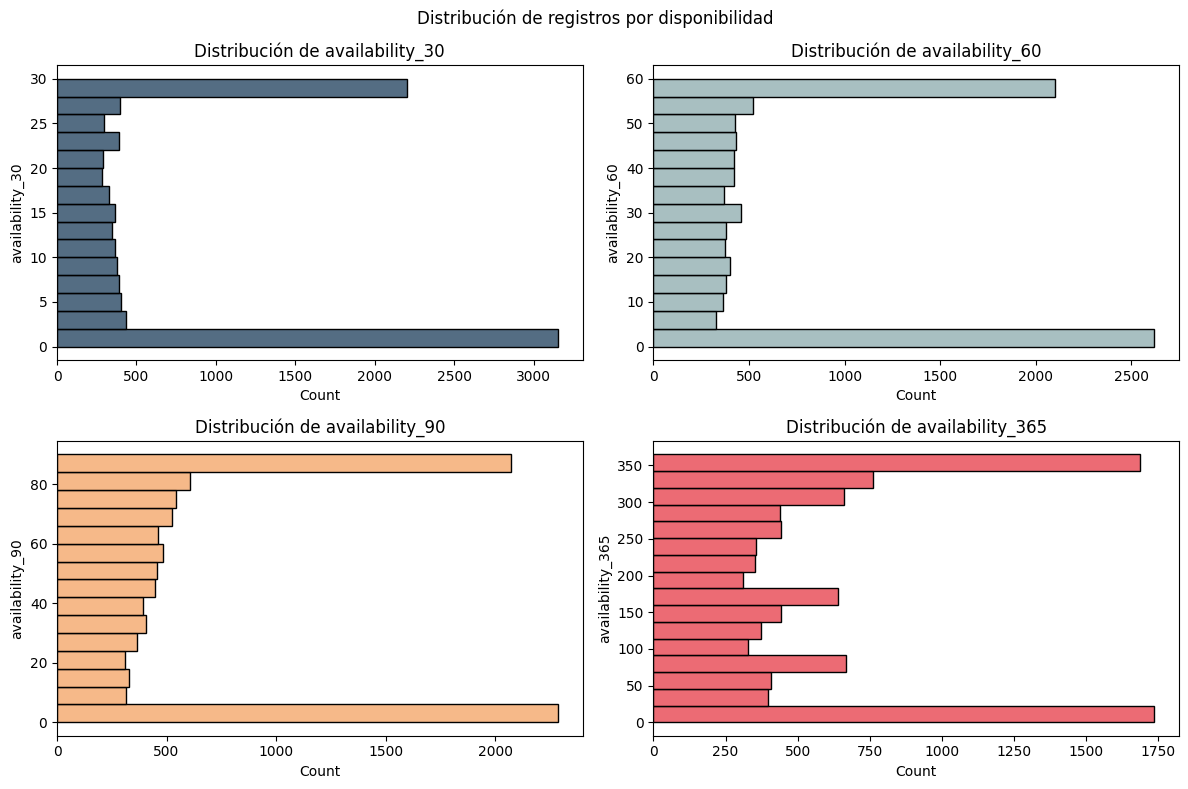

In [29]:
# Seleccionar 4 colores distintos para los boxplots
colores_seleccionados = [paleta[0], paleta[2], paleta[6], paleta[10]]  # Azul profundo, Azul grisáceo, Naranja suave, Rojo coral

# Crear la figura con subgráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Recorrer las columnas y asignarlas a los subgráficos
for i, col in enumerate(availability_cols):
    row, col_idx = divmod(i, 2)  # Calcular posición en la cuadrícula
    sns.histplot(y=df[col], ax=axes[row, col_idx], color=colores_seleccionados[i])  # Aplicar color de la palet  # Crear boxplot
    axes[row, col_idx].set_title(f'Distribución de {col}')  # Agregar título

fig.suptitle("Distribución de registros por disponibilidad")

# Ajustar diseño para evitar superposición
plt.tight_layout()

plt.show()

C:\Users\jodri\AppData\Local\Temp\ipykernel_22328\1265519230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette=paleta[:len(city_counts)])


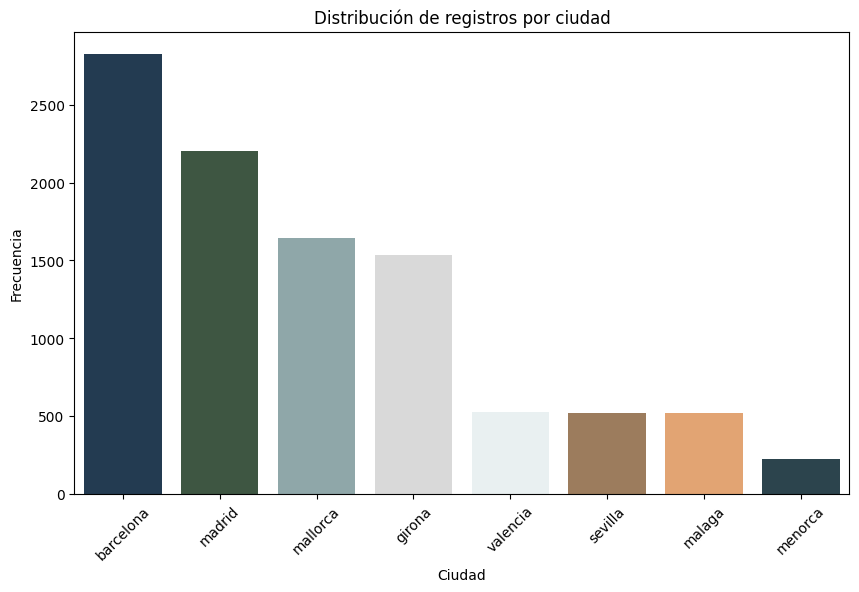

In [30]:
# Contar la frecuencia de cada ciudad
city_counts = df["city"].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette=paleta[:len(city_counts)]) 

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Frecuencia")
plt.title("Distribución de registros por ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

bathrooms
bedrooms
beds   

# Variables y sus valores

In [31]:
print(df['bathrooms'].unique())
print(df['bedrooms'].unique())
print(df['beds'].unique())

[ 2.  1.  4.  0.  5.  3.  7.  6.  9.  8. 10. 12. 11. 13.]
[ 1.  2.  4.  3.  5.  0.  6.  8.  9. 14.  7. 10. 12. 16. 50.]
[ 2  1  4  5  8  6  3 12  9 16  7 11 10 13 15 14 29 18 20 24 19]


## explorando valores atípicos (número alto de habitaciones)

In [32]:
df.sort_values('bedrooms', ascending=False,).head(50)

,apartment_id,name,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,city,insert_date
8456,34523812,NEW RESIDENCE IN MADRID 50 INDIVIDUALS ROOMS,130100816,Pradolongo,Usera,Entire home/apt,1,12.0,50.0,1,"TV,Wifi,Kitchen,Elevator,Heating,Washer,Smoke ...",250.0,1,1125,True,30,60,90,365,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,madrid,2019-06-07
4588,19412149,"Mallaui, a whole palace by the sea",136087677,Ciutadella de Menorca,Desconocido,Entire home/apt,16,7.0,16.0,16,"TV,Wifi,Kitchen,Free parking on premises,Smoki...",950.0,4,30,True,9,10,10,85,4,2018-10-08,2019-09-07,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,True,18.0,menorca,2020-05-31
3247,15883302,Ca's Misser,102986764,Algaida,Desconocido,Entire home/apt,29,8.0,14.0,29,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",950.0,1,1125,True,5,19,27,218,3,NaT,NaT,800.0,80.0,90.0,90.0,60.0,90.0,70.0,True,32.0,mallorca,2020-02-29
1161,5429715,Cal Pubill de Ciuret 35pax,20320423,Vidr�,Desconocido,Entire home/apt,16,9.0,14.0,16,"TV, Indoor fireplace, Pool, Iron, Crib, Hair d...",950.0,2,1125,True,24,54,77,296,1,2019-08-12,2019-08-12,1000.0,100.0,100.0,100.0,100.0,100.0,100.0,True,9.0,girona,2020-10-28
7675,30917851,CAN GRAU (CAN GRAU 24) - Villa for 24 people i...,80839530,Sencelles,Desconocido,Entire home/apt,24,12.0,12.0,24,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",950.0,7,1125,True,0,0,0,164,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,mallorca,2019-04-24
4933,20397361,"Idyllische Finca mit Pool, Garten, Tiere, WLAN",57603545,Sant Lloren� des Cardassar,Desconocido,Entire home/apt,16,11.0,12.0,16,"TV,Cable TV,Wifi,Pool,Kitchen,Free parking on ...",1700.0,6,1125,True,10,34,43,160,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,mallorca,2020-06-25
2586,13576820,Villa Pima. Costa Brava (for 24 people).,51811531,Vidreres,Desconocido,Entire home/apt,16,8.0,12.0,16,"TV,Cable TV,Wifi,Pool,Kitchen,Smoking allowed,...",5000.0,7,14,True,20,20,20,113,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,girona,2019-08-31
9435,40550295,Idyllischer Fincaurlaub f�r Biker inkl. Fr�hst�ck,11125218,Sencelles,Desconocido,Private room,16,13.0,12.0,16,"First aid kit, Indoor fireplace, Wifi, Free pa...",1710.0,3,1125,True,29,59,89,364,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,mallorca,2020-10-21
6234,24228419,Lobos - Llucmajor,96145168,Llucmajor,Desconocido,Entire home/apt,20,8.0,10.0,20,"TV,Cable TV,Internet,Wifi,Pool,Kitchen,Free pa...",950.0,1,1125,True,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,mallorca,2019-09-28
1394,6695341,charming 200 year old �finca�,3774266,Consell,Desconocido,Entire home/apt,16,7.0,10.0,16,"TV,Internet,Wireless Internet,Air conditioning...",950.0,5,1125,False,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,mallorca,2017-03-15


### cambio de tipo de dato a integer

In [33]:
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)

## distribución variables (histogramas)

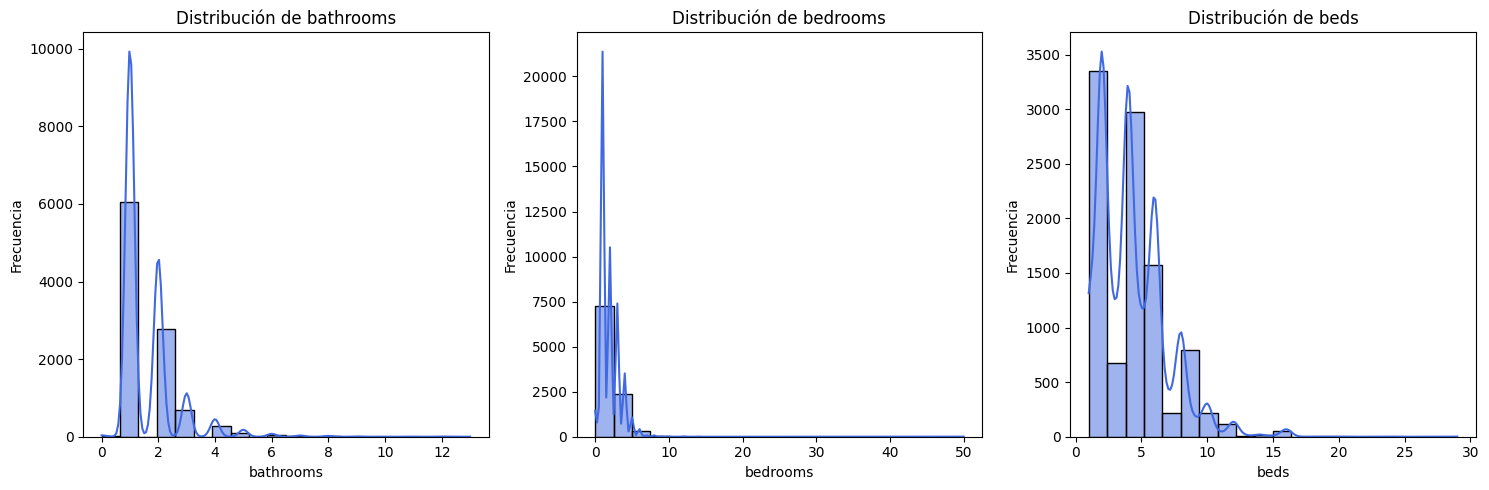

In [34]:
# Lista de variables a analizar
variables = ['bathrooms', 'bedrooms', 'beds']

# Crear figuras para cada histograma
plt.figure(figsize=(15, 5))  # Ajusta el tamaño de la figura

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)  # Crear subgráficos en una fila
    sns.histplot(df[var], bins=20, kde=True, color='royalblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


## distribución valores (boxplot)

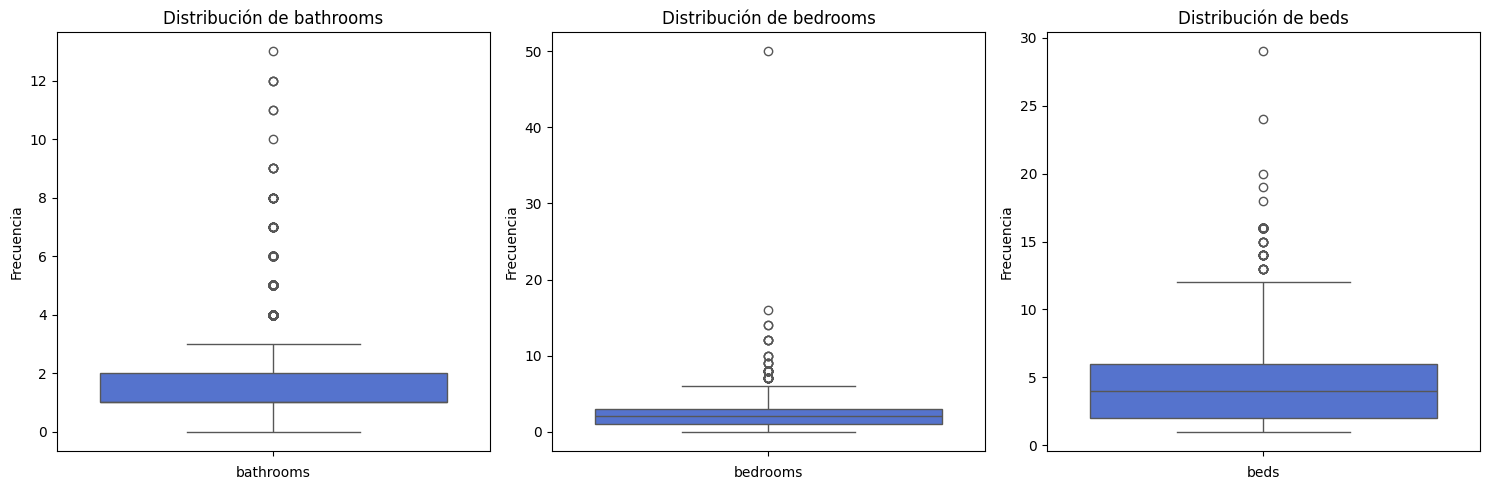

In [35]:
# Crear figuras para cada histograma
plt.figure(figsize=(15, 5))  # Ajusta el tamaño de la figura

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)  # Crear subgráficos en una fila
    sns.boxplot(df[var], color='royalblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# Análisis Outliers

Creamos una columna Outliers

C:\Users\jodri\AppData\Local\Temp\ipykernel_22328\1590141988.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analysis, x="outlier", y="availability_30", palette=["#1B3C59", "#F4A261"])


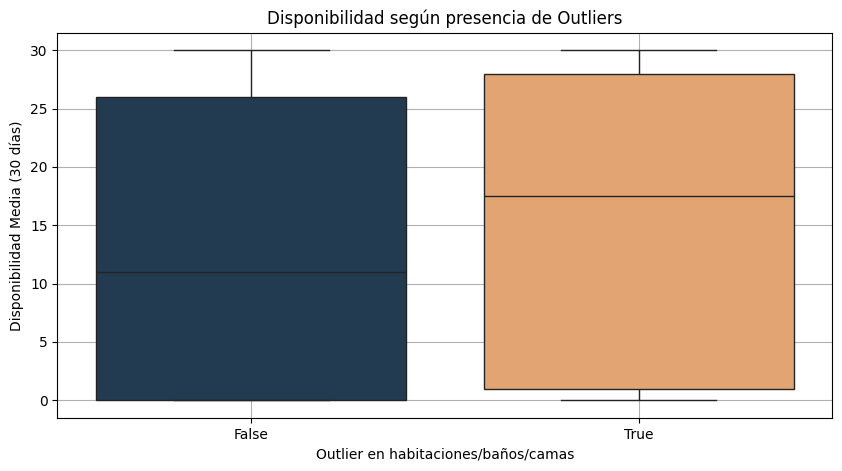

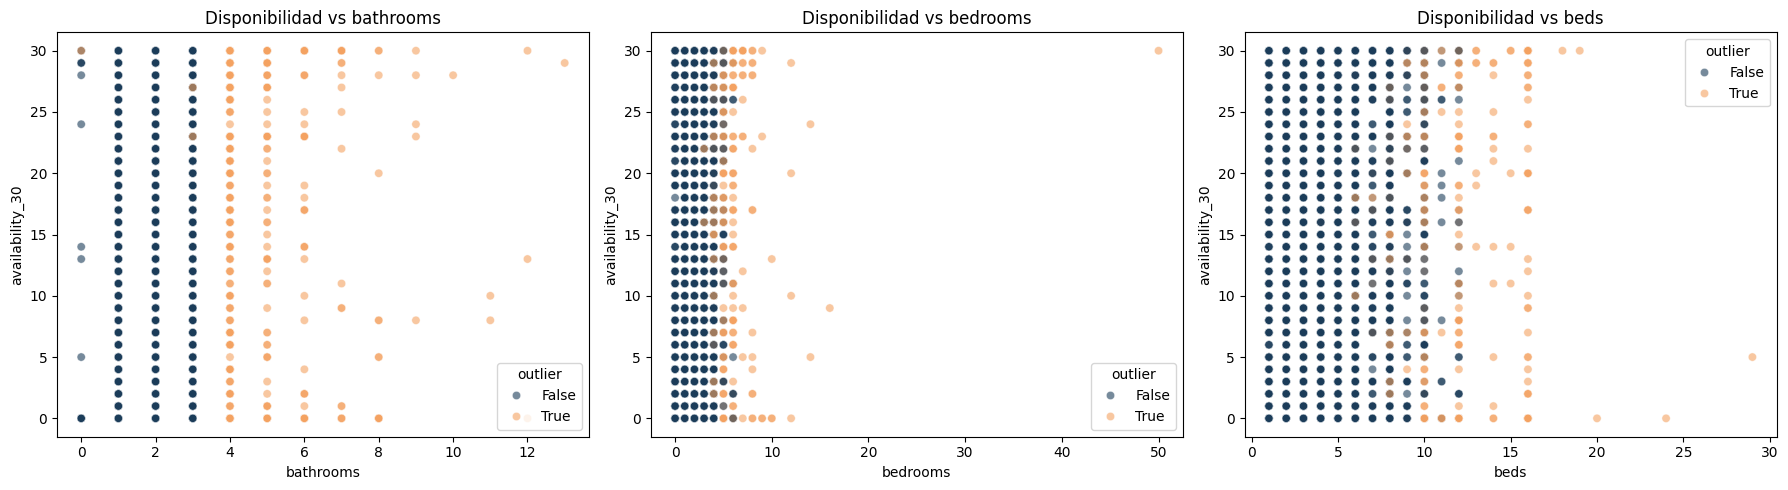

outlier        False      True 
city                           
barcelona  11.867362  16.139535
girona     14.782853  16.972727
madrid     11.630244  16.090909
malaga     12.739216  19.100000
mallorca   13.877447  14.849057
menorca    13.858586  17.038462
sevilla    14.810078  12.500000
valencia   13.419048  10.000000


In [36]:
# Definir las variables de interés
variables = ["bathrooms", "bedrooms", "beds"]
df_analysis = df[variables + ["availability_30", "city"]].copy()

# Convertir a numérico (si hay valores no numéricos como strings)
for col in variables:
    df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce')

# Función para detectar outliers usando IQR
def detectar_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[col] < lower_bound) | (df[col] > upper_bound)

# Crear una columna que identifique si es outlier en alguna variable
df_analysis["outlier"] = False
for col in variables:
    df_analysis["outlier"] = df_analysis["outlier"] | detectar_outliers(df_analysis, col)

# Comparar disponibilidad media entre outliers y no outliers
disponibilidad_comparacion = df_analysis.groupby("outlier")["availability_30"].mean()

# Visualización: Boxplots de disponibilidad por outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_analysis, x="outlier", y="availability_30", palette=["#1B3C59", "#F4A261"])
plt.xlabel("Outlier en habitaciones/baños/camas")
plt.ylabel("Disponibilidad Media (30 días)")
plt.title("Disponibilidad según presencia de Outliers")
plt.grid(True)
plt.show()

# Visualización: Relación entre cada variable y disponibilidad
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(variables):
    sns.scatterplot(data=df_analysis, x=col, y="availability_30", hue="outlier", alpha=0.6, ax=axes[i], palette=["#1B3C59", "#F4A261"])
    axes[i].set_title(f"Disponibilidad vs {col}")
plt.tight_layout()
plt.show()

# Análisis por ciudad
df_city = df_analysis.groupby(["city", "outlier"])["availability_30"].mean().unstack()
print(df_city)


## test estadístico y correlación con disponibilidad

Estadístico de la prueba t: -5.02
Valor p: 0.00000
Conclusión: La diferencia es estadísticamente significativa.

Matriz de correlación:
                 bathrooms  bedrooms      beds  availability_30
bathrooms         1.000000  0.689420  0.621431         0.052469
bedrooms          0.689420  1.000000  0.799933         0.053666
beds              0.621431  0.799933  1.000000         0.071241
availability_30   0.052469  0.053666  0.071241         1.000000


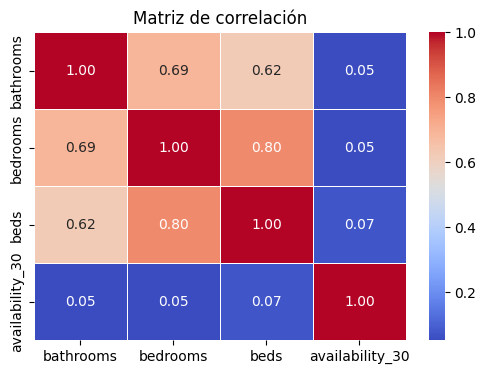

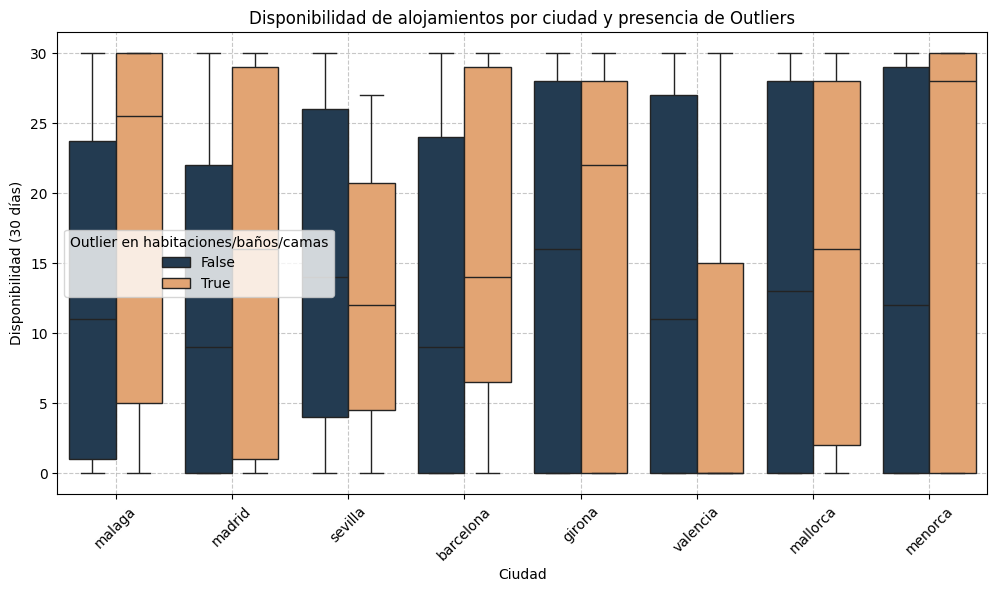

In [37]:
from scipy.stats import ttest_ind

# Separar los grupos con y sin outliers
disponibilidad_sin_outliers = df_analysis[df_analysis["outlier"] == False]["availability_30"]
disponibilidad_con_outliers = df_analysis[df_analysis["outlier"] == True]["availability_30"]

# Prueba t de Student
t_stat, p_value = ttest_ind(disponibilidad_sin_outliers, disponibilidad_con_outliers, equal_var=False)

# Mostrar resultados
print(f"Estadístico de la prueba t: {t_stat:.2f}")
print(f"Valor p: {p_value:.5f}")
if p_value < 0.05:
    print("Conclusión: La diferencia es estadísticamente significativa.")
else:
    print("Conclusión: No hay suficiente evidencia para afirmar que la diferencia es significativa.")

# 📊 Matriz de correlación
correlacion = df_analysis[["bathrooms", "bedrooms", "beds", "availability_30"]].corr()
print("\nMatriz de correlación:")
print(correlacion)

# 📈 Heatmap de correlaciones
plt.figure(figsize=(6,4))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

# 📉 Boxplot por ciudad
plt.figure(figsize=(12,6))
sns.boxplot(data=df_analysis, x="city", y="availability_30", hue="outlier", palette=["#1B3C59", "#F4A261"])
plt.xticks(rotation=45)
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (30 días)")
plt.title("Disponibilidad de alojamientos por ciudad y presencia de Outliers")
plt.legend(title="Outlier en habitaciones/baños/camas")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


## Distribución de disponibilidad por ciudad según si son outliers o no

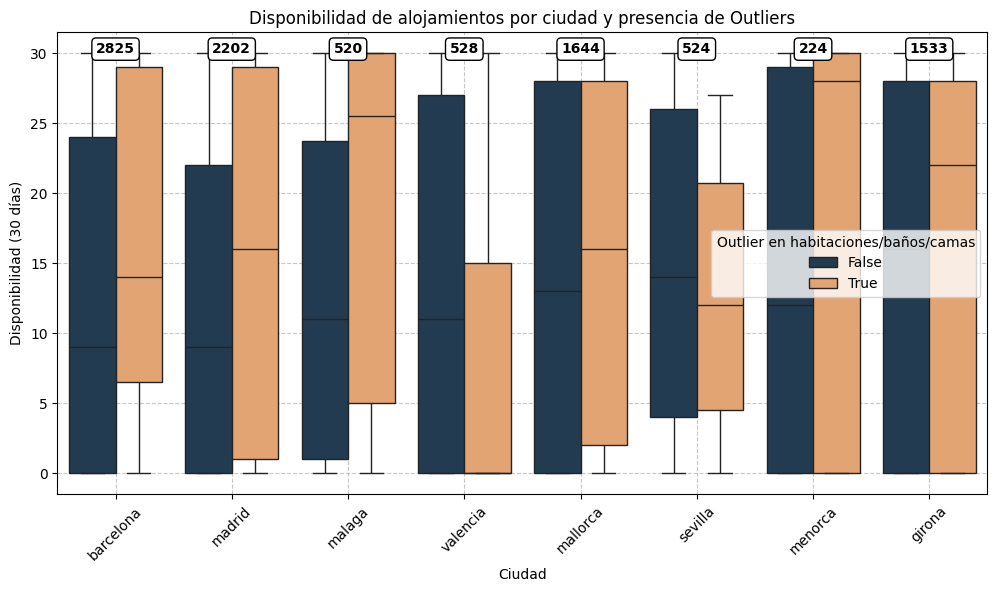

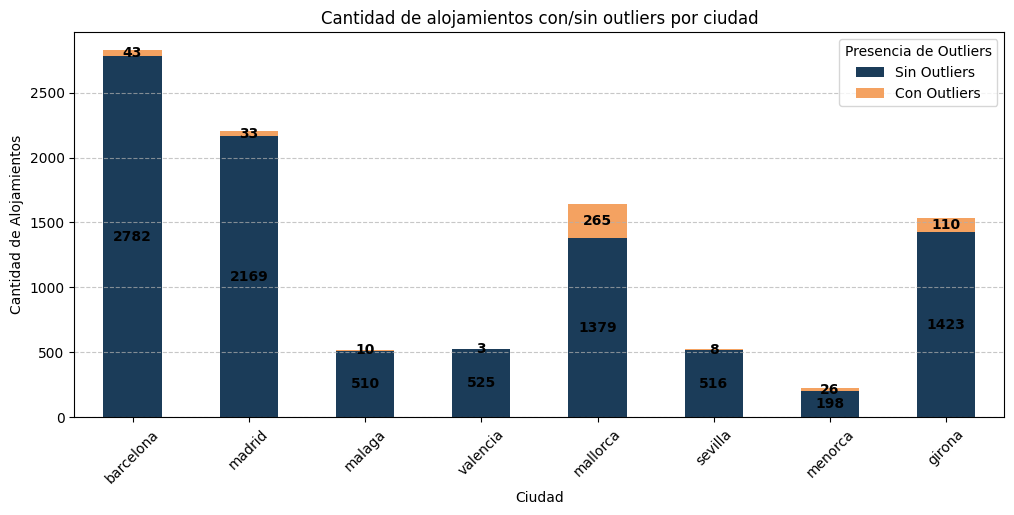

In [38]:
# Ordenamos las ciudades según la mediana de disponibilidad
city_order = df_analysis.groupby("city")["availability_30"].median().sort_values().index

# 📈 Boxplot por ciudad con outliers diferenciados
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_analysis, x="city", y="availability_30", hue="outlier",
                 palette=["#1B3C59", "#F4A261"], order=city_order)

plt.xticks(rotation=45)
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (30 días)")
plt.title("Disponibilidad de alojamientos por ciudad y presencia de Outliers")
plt.legend(title="Outlier en habitaciones/baños/camas")
plt.grid(True, linestyle="--", alpha=0.7)

# Agregamos etiquetas de conteo sobre los boxplots (ajustadas para evitar superposición)
for i, city in enumerate(city_order):
    total_count = len(df_analysis[df_analysis["city"] == city])
    ax.text(i, df_analysis["availability_30"].quantile(0.95), str(total_count),
            horizontalalignment="center", size=10, color="black", weight="semibold",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))

plt.show()

# 📊 Conteo de registros con/sin outliers por ciudad (ordenado igual que el boxplot)
outlier_counts = df_analysis.groupby(["city", "outlier"]).size().unstack().loc[city_order]

# Gráfico de barras mejorado
fig, ax = plt.subplots(figsize=(12, 5))
outlier_counts.plot(kind="bar", stacked=True, ax=ax, color=["#1B3C59", "#F4A261"])

plt.xlabel("Ciudad")
plt.ylabel("Cantidad de Alojamientos")
plt.title("Cantidad de alojamientos con/sin outliers por ciudad")
plt.xticks(rotation=45)

# Agregar etiquetas con los valores de cada barra
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type="center", fontsize=10, color="black", weight="bold")

plt.legend(["Sin Outliers", "Con Outliers"], title="Presencia de Outliers")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [39]:
# Filtrar solo los outliers
outliers_df = df_analysis[df_analysis["outlier"] == True][["bathrooms", "bedrooms", "beds", "city"]]

# Mostrar las primeras filas de la tabla
outliers_df.head(20)  # Puedes cambiar el número si quieres más o menos registros


,bathrooms,bedrooms,beds,city
16,4,4,16,girona
24,5,4,8,girona
25,5,4,8,girona
29,5,1,7,madrid
72,4,4,8,barcelona
87,4,4,8,mallorca
165,4,6,13,menorca
166,7,6,15,mallorca
186,4,5,10,mallorca
267,4,6,12,barcelona


C:\Users\jodri\AppData\Local\Temp\ipykernel_22328\664523318.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bedrooms", y="availability_mean", data=df_filtered, palette=paleta)
C:\Users\jodri\AppData\Local\Temp\ipykernel_22328\664523318.py:16: UserWarning: The palette list has more values (15) than needed (14), which may not be intended.
  sns.boxplot(x="bedrooms", y="availability_mean", data=df_filtered, palette=paleta)


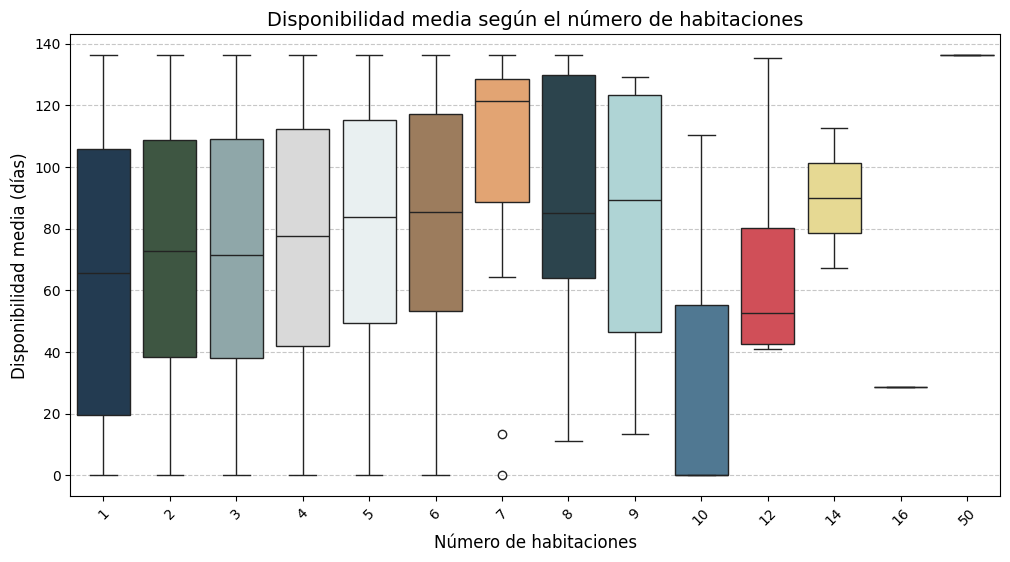

C:\Users\jodri\AppData\Local\Temp\ipykernel_22328\664523318.py:26: UserWarning: The palette list has more values (15) than needed (14), which may not be intended.
  sns.boxplot(x="city", y="availability_mean", hue="bedrooms", data=df_filtered, palette=paleta)


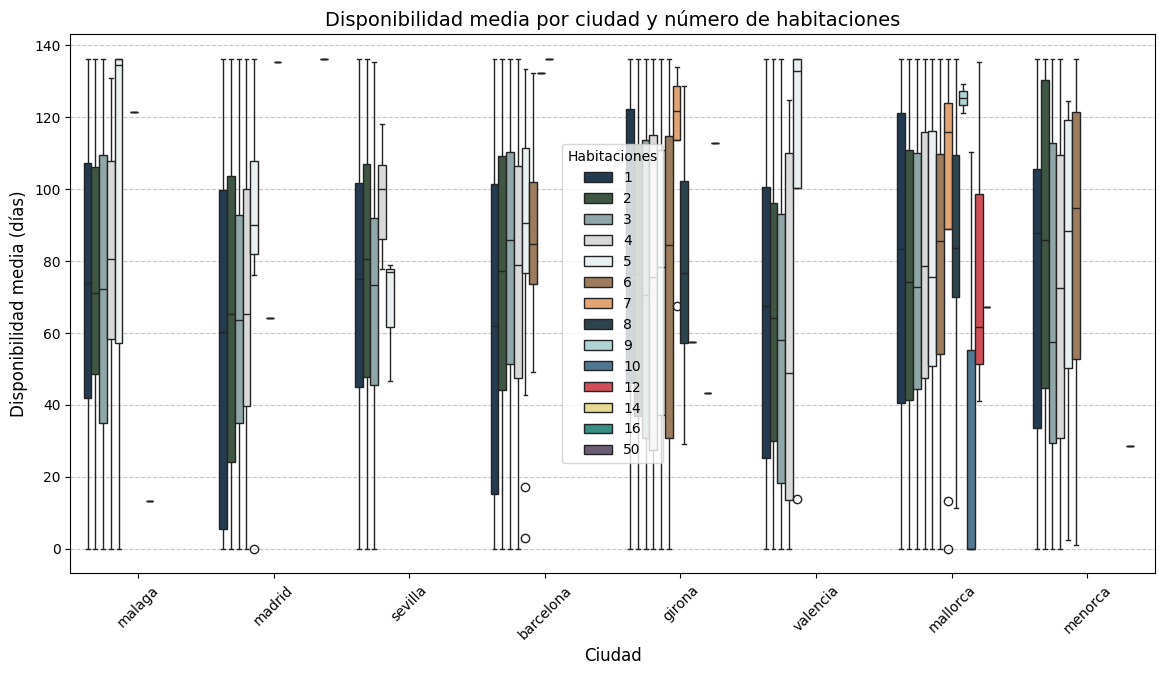

C:\Users\jodri\AppData\Local\Temp\ipykernel_22328\664523318.py:37: UserWarning: The palette list has more values (15) than needed (8), which may not be intended.
  sns.scatterplot(x="beds", y="availability_mean", hue="city", data=df_filtered, palette=paleta)


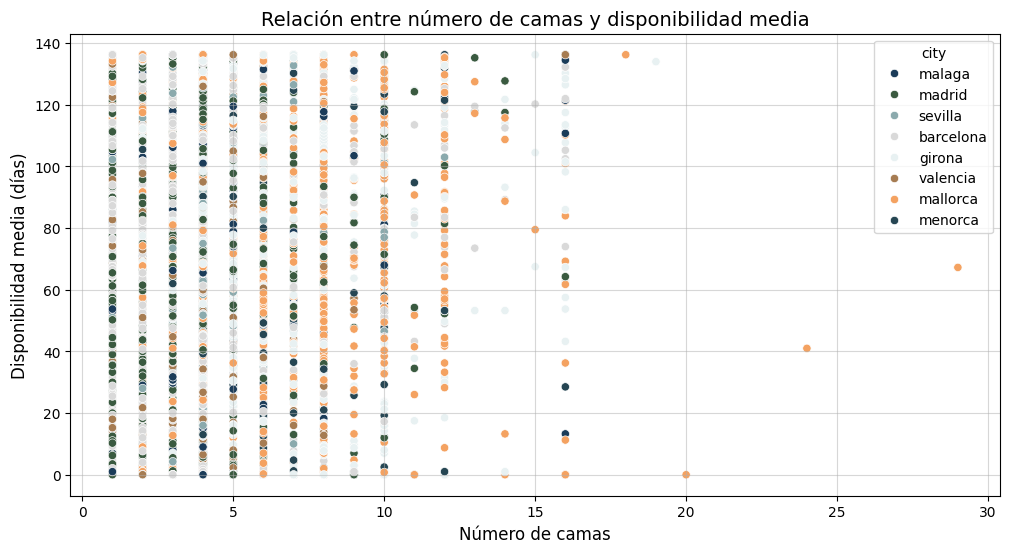

In [40]:
# Crear una columna con disponibilidad media (promedio de diferentes períodos)
df["availability_mean"] = df[["availability_30", "availability_60", "availability_90", "availability_365"]].mean(axis=1)

# Filtrar valores extremos (opcional)
df_filtered = df[(df["bedrooms"] > 0) & (df["bathrooms"] > 0) & (df["beds"] > 0)]  

# Configurar paleta de colores
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", "#E8F1F2", "#A67C52",
    "#F4A261", "#264653", "#A8DADC", "#457B9D", "#E63946", "#F4E285",
    "#2A9D8F", "#6D597A", "#B5838D"
]

# 📌 Boxplot de disponibilidad por número de habitaciones
plt.figure(figsize=(12, 6))
sns.boxplot(x="bedrooms", y="availability_mean", data=df_filtered, palette=paleta)
plt.xlabel("Número de habitaciones", fontsize=12)
plt.ylabel("Disponibilidad media (días)", fontsize=12)
plt.title("Disponibilidad media según el número de habitaciones", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 📌 Boxplot de disponibilidad por ciudad y número de habitaciones
plt.figure(figsize=(14, 7))
sns.boxplot(x="city", y="availability_mean", hue="bedrooms", data=df_filtered, palette=paleta)
plt.xlabel("Ciudad", fontsize=12)
plt.ylabel("Disponibilidad media (días)", fontsize=12)
plt.title("Disponibilidad media por ciudad y número de habitaciones", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Habitaciones")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 📌 Scatterplot: Camas vs Disponibilidad
plt.figure(figsize=(12, 6))
sns.scatterplot(x="beds", y="availability_mean", hue="city", data=df_filtered, palette=paleta)
plt.xlabel("Número de camas", fontsize=12)
plt.ylabel("Disponibilidad media (días)", fontsize=12)
plt.title("Relación entre número de camas y disponibilidad media", fontsize=14)
plt.grid(alpha=0.5)
plt.show()


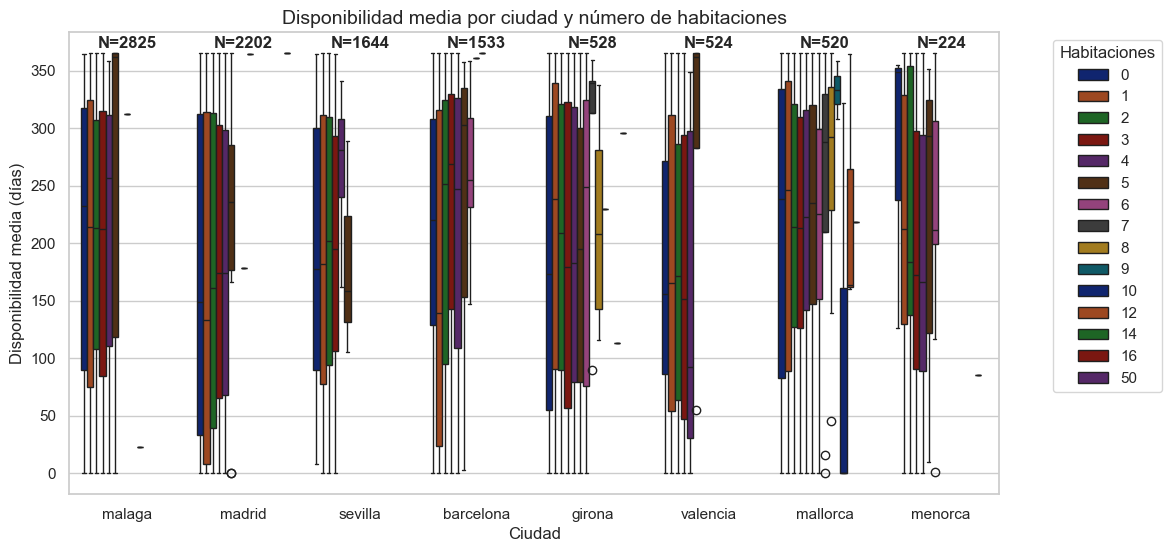

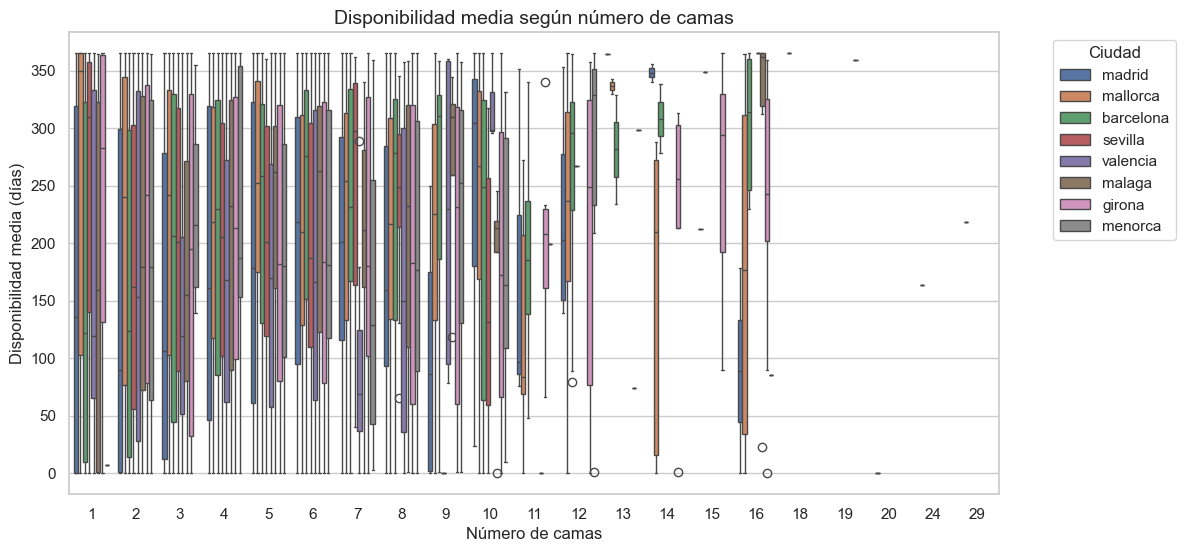

Correlaciones entre disponibilidad y otras variables:
                  availability_365  bedrooms      beds  bathrooms
availability_365          1.000000  0.097332  0.131045   0.069913
bedrooms                  0.097332  1.000000  0.799933   0.689420
beds                      0.131045  0.799933  1.000000   0.621431
bathrooms                 0.069913  0.689420  0.621431   1.000000


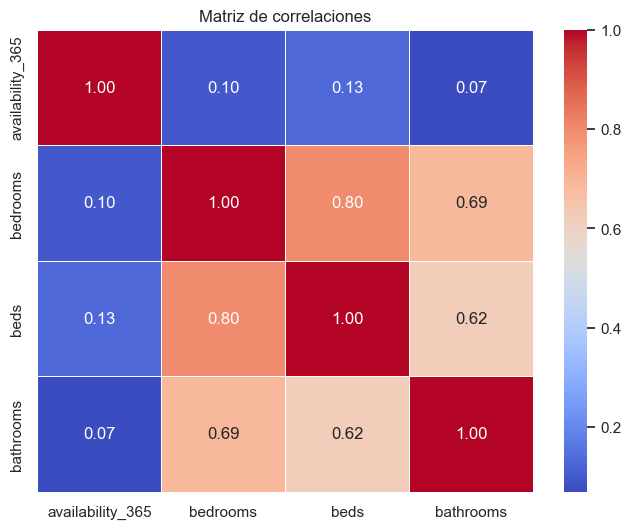

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df es el DataFrame con los datos
# df = pd.read_csv('tu_archivo.csv')

# Configuración del estilo
sns.set(style="whitegrid")

# Gráfico 1: Boxplot con etiquetas de conteo
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='city', y='availability_365', hue='bedrooms', palette='dark')

# Agregar etiquetas de conteo en la parte superior
counts = df['city'].value_counts()
for i, city in enumerate(counts.index):
    plt.text(i, df['availability_365'].max() + 5, f"N={counts[city]}", 
             ha='center', fontsize=12, fontweight='bold')

plt.title("Disponibilidad media por ciudad y número de habitaciones", fontsize=14)
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad media (días)")
plt.legend(title="Habitaciones", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico 2: Boxplot de disponibilidad media por número de camas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='beds', y='availability_365', hue='city', palette='deep')
plt.title("Disponibilidad media según número de camas", fontsize=14)
plt.xlabel("Número de camas")
plt.ylabel("Disponibilidad media (días)")
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Análisis 3: Tabla de correlación entre disponibilidad, habitaciones, camas y baños
correlation_matrix = df[['availability_365', 'bedrooms', 'beds', 'bathrooms']].corr()
print("Correlaciones entre disponibilidad y otras variables:")
print(correlation_matrix)

# Heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlaciones")
plt.show()


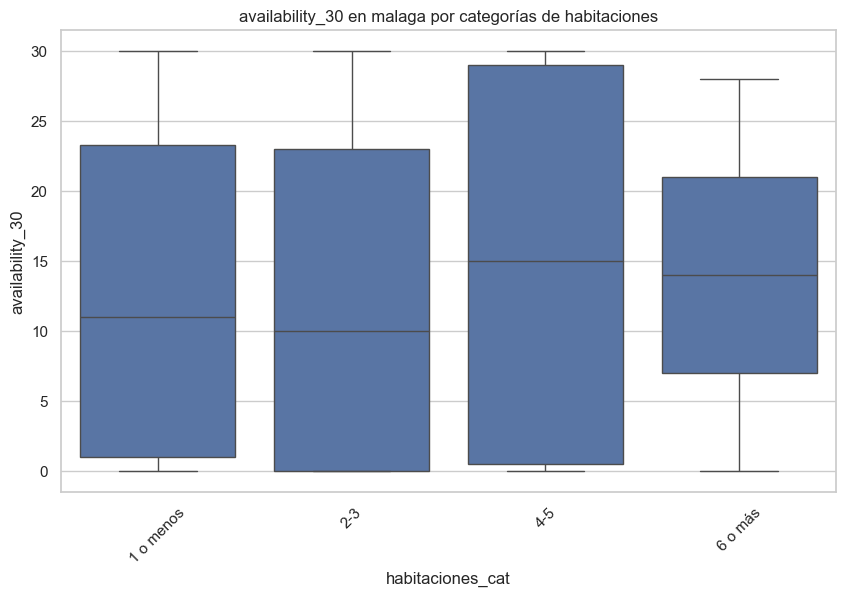

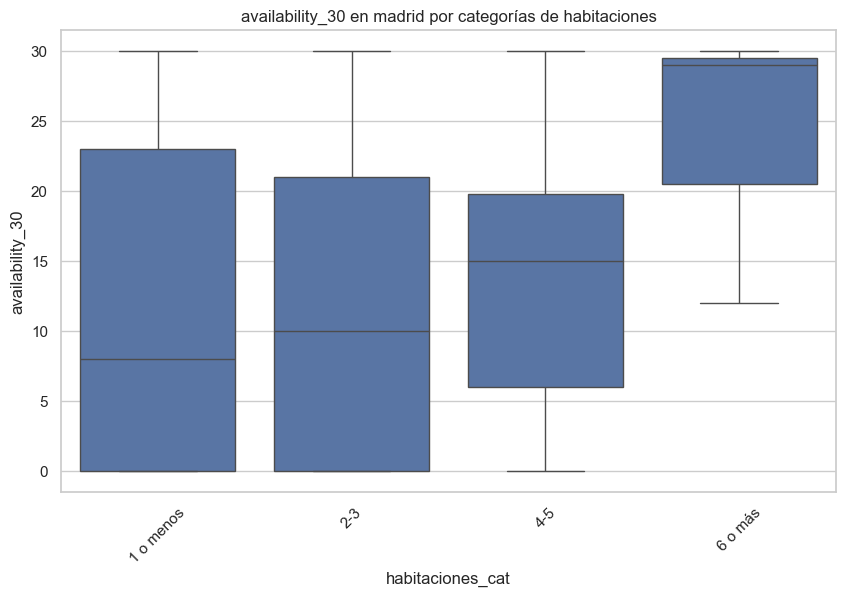

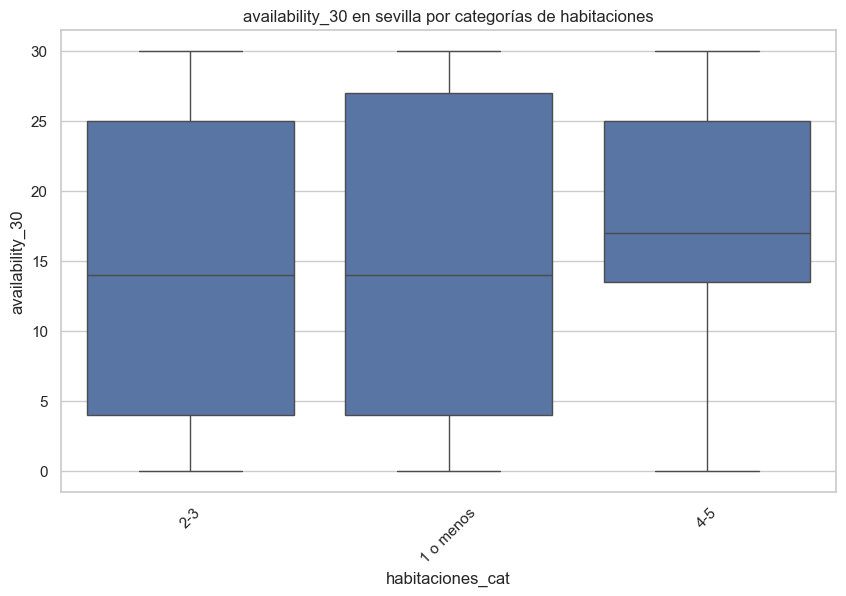

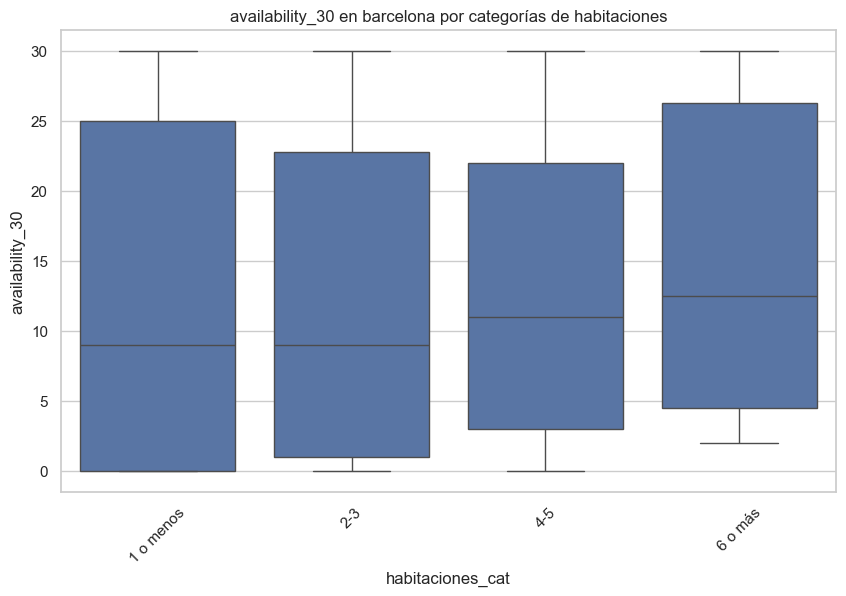

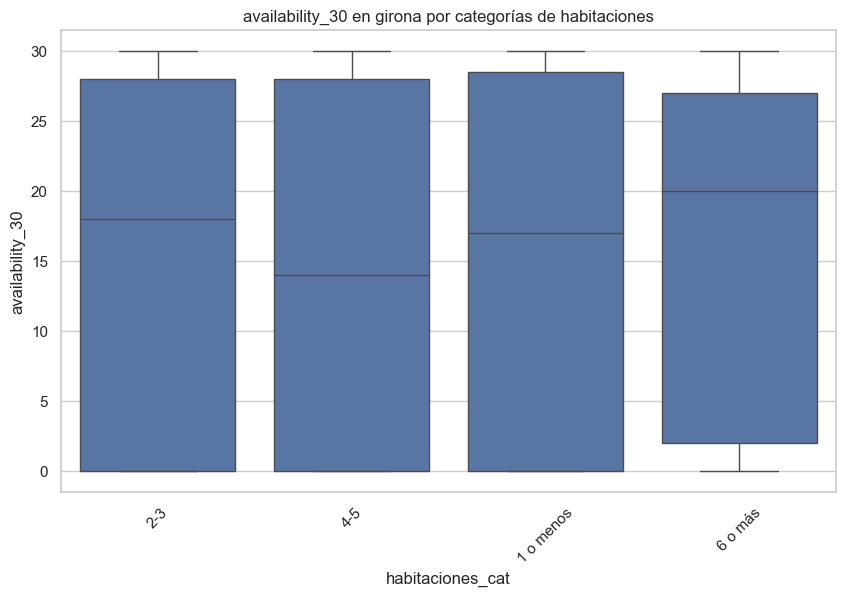

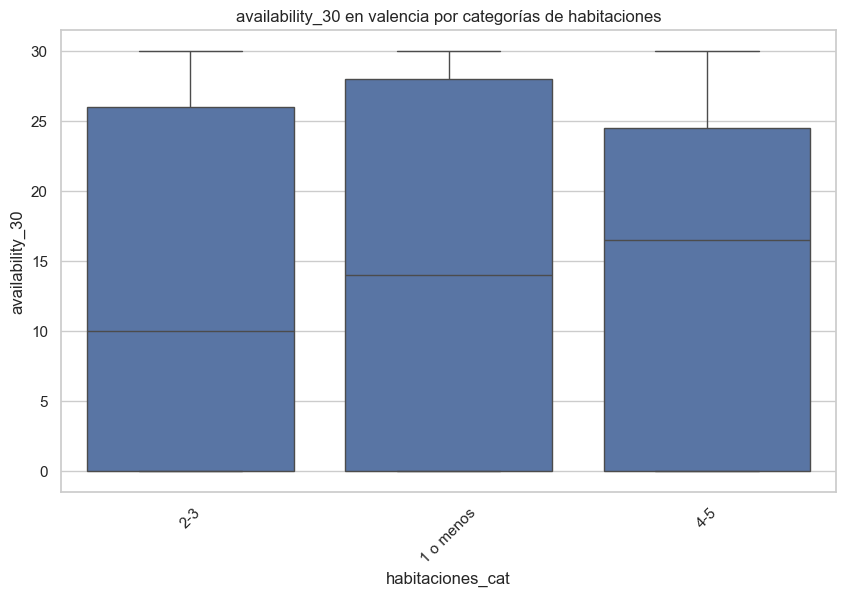

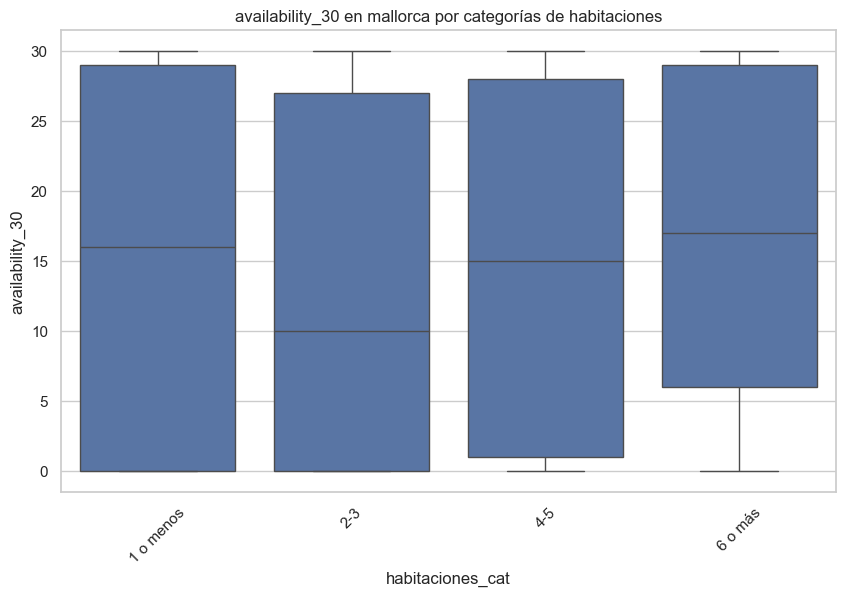

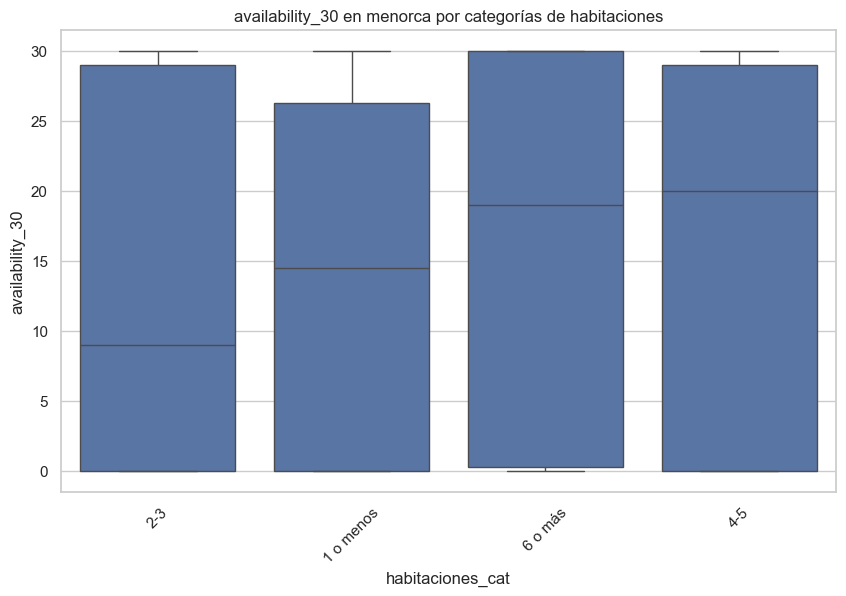

ValueError: could not convert string to float: 'A ROOM WITH A VIEW'

In [42]:
# Agrupar habitaciones, baños y camas en categorías
def categorizar(valor):
    if valor <= 1:
        return "1 o menos"
    elif valor <= 3:
        return "2-3"
    elif valor <= 5:
        return "4-5"
    else:
        return "6 o más"

df["habitaciones_cat"] = df["bedrooms"].apply(categorizar)
df["banos_cat"] = df["bathrooms"].apply(categorizar)
df["camas_cat"] = df["beds"].apply(categorizar)

# Crear gráficos separados por ciudad
ciudades = df["city"].unique()
for ciudad in ciudades:
    plt.figure(figsize=(10, 6))
    subset = df[df["city"] == ciudad]
    sns.boxplot(x="habitaciones_cat", y="availability_30", data=subset)
    plt.title(f"availability_30 en {ciudad} por categorías de habitaciones")
    plt.xticks(rotation=45)
    plt.show()

# Analizar correlación dentro de cada ciudad
for ciudad in ciudades:
    subset = df[df["city"] == ciudad]
    correlacion = subset.corr()["availability_30"]
    print(f"Correlaciones en {ciudad}:\n{correlacion}\n")


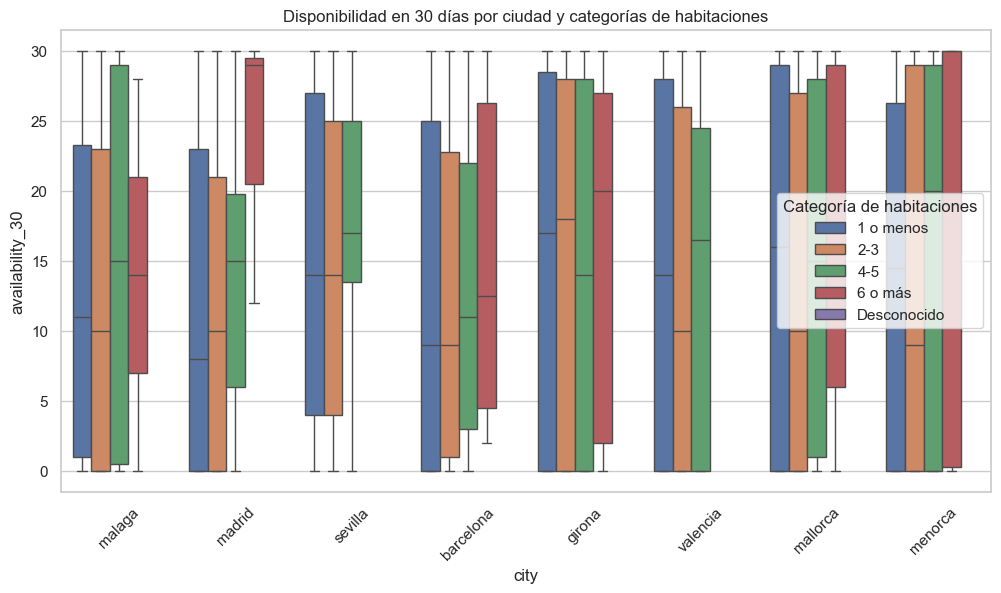

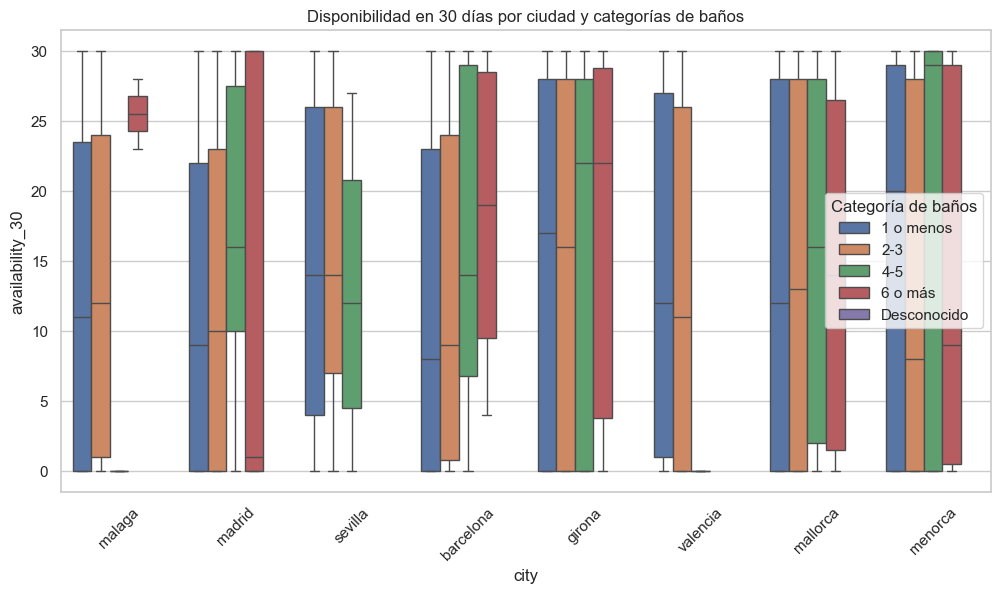

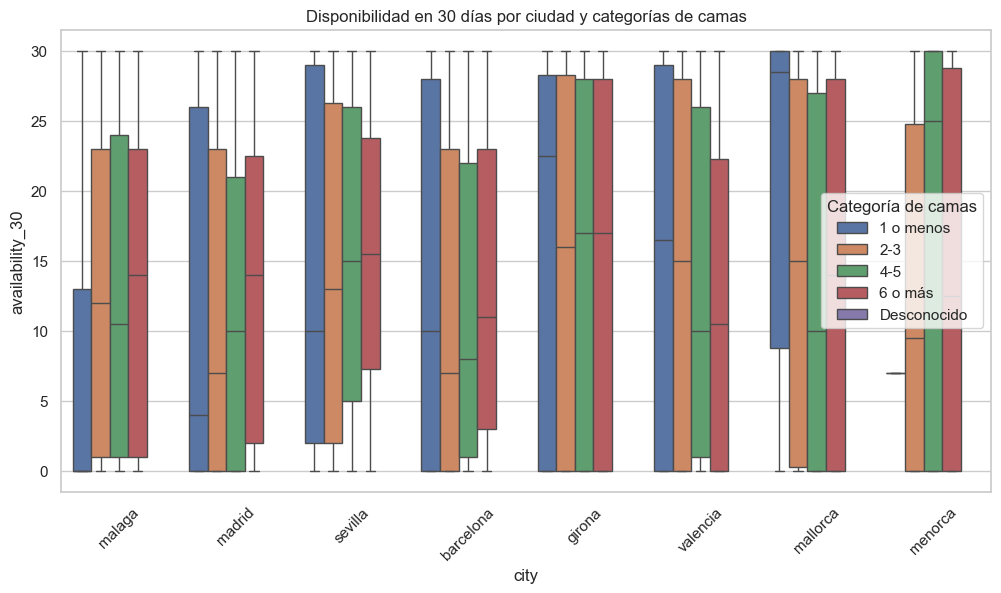

In [ ]:
# Función para categorizar habitaciones, baños y camas
def categorizar(valor):
    if pd.isna(valor):
        return "Desconocido"
    elif valor <= 1:
        return "1 o menos"
    elif valor <= 3:
        return "2-3"
    elif valor <= 5:
        return "4-5"
    else:
        return "6 o más"

# Aplicar categorización
df["habitaciones_cat"] = df["bedrooms"].apply(categorizar)
df["banos_cat"] = df["bathrooms"].apply(categorizar)
df["camas_cat"] = df["beds"].apply(categorizar)

# Asegurar orden de categorías
orden_categorias = ["1 o menos", "2-3", "4-5", "6 o más", "Desconocido"]

# Gráfico combinado para habitaciones
plt.figure(figsize=(12, 6))
sns.boxplot(x="city", y="availability_30", hue="habitaciones_cat", data=df, hue_order=orden_categorias)
plt.title("Disponibilidad en 30 días por ciudad y categorías de habitaciones")
plt.xticks(rotation=45)
plt.legend(title="Categoría de habitaciones")
plt.show()

# Repetir para baños
plt.figure(figsize=(12, 6))
sns.boxplot(x="city", y="availability_30", hue="banos_cat", data=df, hue_order=orden_categorias)
plt.title("Disponibilidad en 30 días por ciudad y categorías de baños")
plt.xticks(rotation=45)
plt.legend(title="Categoría de baños")
plt.show()

# Repetir para camas
plt.figure(figsize=(12, 6))
sns.boxplot(x="city", y="availability_30", hue="camas_cat", data=df, hue_order=orden_categorias)
plt.title("Disponibilidad en 30 días por ciudad y categorías de camas")
plt.xticks(rotation=45)
plt.legend(title="Categoría de camas")
plt.show()



## Distribución de Disponibilidad a 30 días, por ciudad

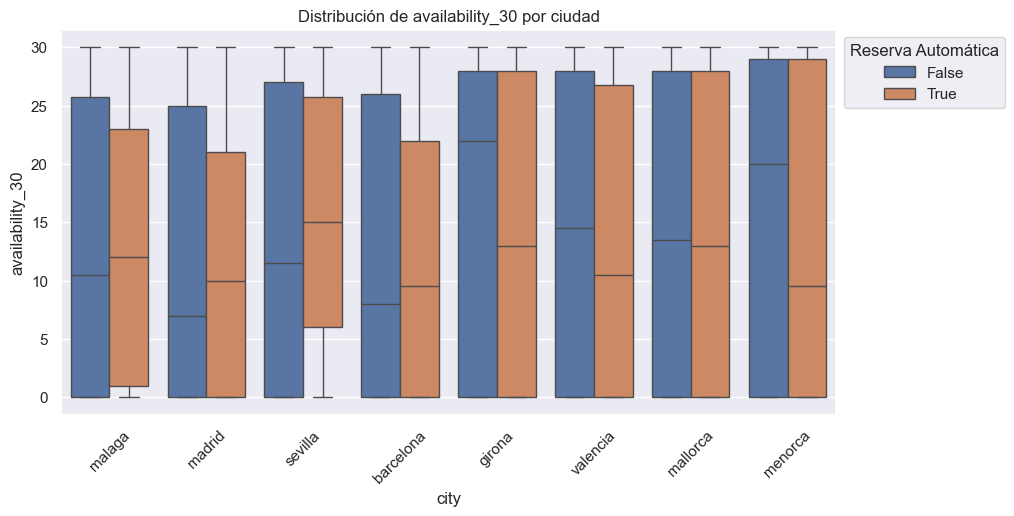

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="city", y="availability_30", hue="is_instant_bookable", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de availability_30 por ciudad")
plt.legend(title="Reserva Automática", loc="upper left", bbox_to_anchor=(1, 1))  # Ajustar posición fuera del gráfico
plt.show()

# Test Estadísticos

### Test de Normalidad Shapiro

In [ ]:
from scipy.stats import shapiro

for col in availability_cols:
    stat, p = shapiro(df[col].dropna())  # Se eliminan valores nulos para evitar errores
    print(f"Shapiro-Wilk Test para {col}: Estadístico={stat}, p-valor={p}")
    if p > 0.05:
        print("No se rechaza la normalidad (puede ser normal)")
    else:
        print("Se rechaza la normalidad (no es normal)")

Shapiro-Wilk Test para availability_30: Estadístico=0.8387881507678311, p-valor=5.477928267802339e-72
Se rechaza la normalidad (no es normal)
Shapiro-Wilk Test para availability_60: Estadístico=0.8678258968501431, p-valor=6.672262995622411e-68
Se rechaza la normalidad (no es normal)
Shapiro-Wilk Test para availability_90: Estadístico=0.8782560388226207, p-valor=3.0165700770161904e-66
Se rechaza la normalidad (no es normal)
Shapiro-Wilk Test para availability_365: Estadístico=0.8985545410730674, p-valor=1.1955955704510382e-62
Se rechaza la normalidad (no es normal)


c:\Users\jodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


Todas las columnas de disponibilidad siguen una distribución no normal.

### Test Mannwhitneyu

In [ ]:
from scipy.stats import mannwhitneyu

# Aplicación Mann-Whitney U Test( Para conocer si hay diferencias significativas)
for col in availability_cols:
    group1 = df[df["is_instant_bookable"] == 0][col].dropna()
    group2 = df[df["is_instant_bookable"] == 1][col].dropna()
    
    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
    print(f"Mann-Whitney U Test para {col}: Estadístico={stat}, p-valor={p}")

Mann-Whitney U Test para availability_30: Estadístico=12043765.5, p-valor=0.3498387666728776
Mann-Whitney U Test para availability_60: Estadístico=12118410.5, p-valor=0.6882414650725159
Mann-Whitney U Test para availability_90: Estadístico=12206790.0, p-valor=0.82368182617346
Mann-Whitney U Test para availability_365: Estadístico=12269534.5, p-valor=0.5073170990366069


El p-value es superior al nivel de significancia de 0.05, lo que indica que no se puede rechazar la hipótesis nula. Esto sugiere que no existen diferencias estadísticamente significativas en la disponibilidad entre alojamientos con reserva instantánea y aquellos que no cuentan con esta opción. En consecuencia, no hay evidencia suficiente para afirmar que la disponibilidad se vea afectada por la característica instant_bookable.

# TEST ANOVA

### SUPUESTO DE NORMALIDAD

##### Normalidad factor is_instant_bookable

In [ ]:
import scipy.stats as stats

# Definir el factor y la variable dependiente
factor = "is_instant_bookable"
variable_dependiente = "availability_30"

# Almacenar resultados
results = []

# Evaluar normalidad para cada valor del factor
for value in df[factor].unique():
    subset = df[df[factor] == value][variable_dependiente].dropna()
    
    # Verificar que el grupo tiene suficientes datos para Shapiro-Wilk
    if len(subset) > 3:
        stat, p_value = stats.shapiro(subset)
        results.append([variable_dependiente, factor, value, stat, p_value])
    else:
        results.append([variable_dependiente, factor, value, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame y mostrar
df_results_is_instant = pd.DataFrame(results, columns=["Variable", "Factor", "Valor", "Statistic", "P-value"])
print(df_results_is_instant)

          Variable               Factor  Valor  Statistic       P-value
0  availability_30  is_instant_bookable  False   0.815747  1.499151e-56
1  availability_30  is_instant_bookable   True   0.854292  1.116086e-58


c:\Users\jodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5806.
  res = hypotest_fun_out(*samples, **kwds)


##### Normalidad factor city

In [ ]:
# Definir el factor y la variable dependiente
factor = "city"

# Almacenar resultados
results = []

# Evaluar normalidad para cada valor del factor
for value in df[factor].unique():
    subset = df[df[factor] == value][variable_dependiente].dropna()
    
    # Verificar que el grupo tiene suficientes datos para Shapiro-Wilk
    if len(subset) > 3:
        stat, p_value = stats.shapiro(subset)
        results.append([variable_dependiente, factor, value, stat, p_value])
    else:
        results.append([variable_dependiente, factor, value, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame y mostrar
df_results_city = pd.DataFrame(results, columns=["Variable", "Factor", "Valor", "Statistic", "P-value"])
print(df_results_city)

          Variable Factor      Valor  Statistic       P-value
0  availability_30   city     malaga   0.871483  2.709110e-20
1  availability_30   city     madrid   0.839270  1.410857e-42
2  availability_30   city    sevilla   0.894744  1.746960e-18
3  availability_30   city  barcelona   0.838792  6.591649e-47
4  availability_30   city     girona   0.803112  1.191192e-39
5  availability_30   city   valencia   0.831362  3.444596e-23
6  availability_30   city   mallorca   0.836199  3.995069e-38
7  availability_30   city    menorca   0.759060  8.144919e-18


El p_value es claramente inferior en todos los casos, por lo que se rechaza la hipotesis nula de normalidad. No cumpliendose este primer supuesto.

### SUPUESTO DE HOMOCEDASTICIDAD

##### Homocedastidad factor is_instant_bookable

In [ ]:
# Definir el factor y la variable dependiente
factor = "is_instant_bookable"
variable_dependiente = "availability_30"

# Crear lista para almacenar los grupos
groups = []

# Agrupar los datos según el factor
for value in df[factor].unique():
    subset = df[df[factor] == value][variable_dependiente].dropna()
    
    # Solo añadir grupos con suficientes datos
    if len(subset) > 3:
        groups.append(subset)

# Aplicar el test de Levene si hay al menos 2 grupos con datos
if len(groups) > 1:
    stat, p_value = stats.levene(*groups)
    print(f"Test de Levene para {factor} - Statistic: {stat:.4f}, P-value: {p_value:.4e}")

    # Interpretación
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: Se asume homocedasticidad (varianzas iguales).")
    else:
        print("Se rechaza la hipótesis nula: No hay homocedasticidad (varianzas diferentes).")
else:
    print(f"No hay suficientes grupos con datos para realizar el test de Levene sobre {factor}.")

Test de Levene para is_instant_bookable - Statistic: 73.0959, P-value: 1.4157e-17
Se rechaza la hipótesis nula: No hay homocedasticidad (varianzas diferentes).


##### Homocedastidad factor city

In [ ]:
# Definir el factor
factor = "city"

# Crear lista para almacenar los grupos
groups = []

# Agrupar los datos según el factor
for value in df[factor].unique():
    subset = df[df[factor] == value][variable_dependiente].dropna()
    
    # Solo añadir grupos con suficientes datos
    if len(subset) > 3:
        groups.append(subset)

# Aplicar el test de Levene si hay al menos 2 grupos con datos
if len(groups) > 1:
    stat, p_value = stats.levene(*groups)
    print(f"Test de Levene para {factor} - Statistic: {stat:.4f}, P-value: {p_value:.4e}")

    # Interpretación
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: Se asume homocedasticidad (varianzas iguales).")
    else:
        print("Se rechaza la hipótesis nula: No hay homocedasticidad (varianzas diferentes).")
else:
    print(f"No hay suficientes grupos con datos para realizar el test de Levene sobre {factor}.")

Test de Levene para city - Statistic: 26.7704, P-value: 1.2149e-36
Se rechaza la hipótesis nula: No hay homocedasticidad (varianzas diferentes).


### EJECUCIÓN TWO WAY ANOVA a 30 días

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Definir la variable dependiente y los factores
variable_dependiente = "availability_30"
factor_1 = "is_instant_bookable"
factor_2 = "city"

# Eliminar valores nulos en las columnas necesarias
df_anova = df[[variable_dependiente, factor_1, factor_2]].dropna()

# Convertir los factores en tipo categórico
df_anova[factor_1] = df_anova[factor_1].astype("category")
df_anova[factor_2] = df_anova[factor_2].astype("category")

# Definir el modelo ANOVA de dos factores con interacción
modelo = smf.ols(f"{variable_dependiente} ~ C({factor_1}) + C({factor_2}) + C({factor_1}):C({factor_2})", data=df_anova).fit()

# Calcular la tabla ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados
print(anova_table)


                                      sum_sq      df          F        PR(>F)
C(is_instant_bookable)          4.446464e+02     1.0   3.216135  7.294587e-02
C(city)                         1.691524e+04     7.0  17.478312  3.497109e-23
C(is_instant_bookable):C(city)  3.217537e+03     7.0   3.324643  1.541061e-03
Residual                        1.380337e+06  9984.0        NaN           NaN


is_instant_bookable(no significativa)
city(extremadamente significativa)
is_instant_bookable + city (significativa)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Definir la variable dependiente y el factor
variable_dependiente = "availability_30"
factor = "is_instant_bookable"

# Lista para almacenar los resultados
results = []

# Iterar sobre cada ciudad
for city in df["city"].unique():
    # Filtrar datos por ciudad
    df_city = df[df["city"] == city][[variable_dependiente, factor]].dropna()

    # Verificar que hay suficientes datos en ambas categorías
    if df_city[factor].nunique() > 1:
        # Convertir el factor en categórico
        df_city[factor] = df_city[factor].astype("category")

        # Ajustar modelo ANOVA
        modelo = smf.ols(f"{variable_dependiente} ~ C({factor})", data=df_city).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)

        # Extraer valores relevantes
        stat = anova_table["F"][0]
        p_value = anova_table["PR(>F)"][0]
        results.append([city, stat, p_value])
    else:
        results.append([city, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame
df_results = pd.DataFrame(results, columns=["City", "F-statistic", "P-value"])

# Mostrar resultados en la consola
print(df_results)

        City  F-statistic   P-value
0     malaga     0.013329  0.908133
1     madrid     0.168516  0.681474
2    sevilla     3.883224  0.049299
3  barcelona     0.365735  0.545387
4     girona    18.094262  0.000022
5   valencia     0.933306  0.334449
6   mallorca     0.084818  0.770908
7    menorca     0.804596  0.370694


C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\2906869651.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\2906869651.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\2906869651.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us

El impacto de is_instant_bookable en availability_30 es significativo solo en Sevilla y Girona.

En Sevilla hay mas disponibilidad cuando existe reserva automática, mientras que en Girona existe mas disponibilidad cuándo NO hay reserva automática.

Estas son las únicas ciudades donde el p-valor es ≤ 0.05, lo que indica que is_instant_bookable tiene un efecto estadísticamente significativo sobre availability_30.

### EJECUCIÓN TWO WAY ANOVA a 60 días

In [ ]:
# Definir la variable dependiente y los factores
variable_dependiente = "availability_60"
factor_1 = "is_instant_bookable"
factor_2 = "city"

# Eliminar valores nulos en las columnas necesarias
df_anova = df[[variable_dependiente, factor_1, factor_2]].dropna()

# Convertir los factores en tipo categórico
df_anova[factor_1] = df_anova[factor_1].astype("category")
df_anova[factor_2] = df_anova[factor_2].astype("category")

# Definir el modelo ANOVA de dos factores con interacción
modelo = smf.ols(f"{variable_dependiente} ~ C({factor_1}) + C({factor_2}) + C({factor_1}):C({factor_2})", data=df_anova).fit()

# Calcular la tabla ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados
print(anova_table)


                                      sum_sq      df          F        PR(>F)
C(is_instant_bookable)          3.477405e+02     1.0   0.665372  4.146893e-01
C(city)                         4.167672e+04     7.0  11.392124  1.785003e-14
C(is_instant_bookable):C(city)  1.704362e+04     7.0   4.658788  3.188052e-05
Residual                        5.217895e+06  9984.0        NaN           NaN


is_instant_bookable(no significativa)
city(extremadamente significativa)
is_instant_bookable + city (significativa)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Definir la variable dependiente y el factor
variable_dependiente = "availability_60"
factor = "is_instant_bookable"

# Lista para almacenar los resultados
results = []

# Iterar sobre cada ciudad
for city in df["city"].unique():
    # Filtrar datos por ciudad
    df_city = df[df["city"] == city][[variable_dependiente, factor]].dropna()

    # Verificar que hay suficientes datos en ambas categorías
    if df_city[factor].nunique() > 1:
        # Convertir el factor en categórico
        df_city[factor] = df_city[factor].astype("category")

        # Ajustar modelo ANOVA
        modelo = smf.ols(f"{variable_dependiente} ~ C({factor})", data=df_city).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)

        # Extraer valores relevantes
        stat = anova_table["F"][0]
        p_value = anova_table["PR(>F)"][0]
        results.append([city, stat, p_value])
    else:
        results.append([city, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame
df_results = pd.DataFrame(results, columns=["City", "F-statistic", "P-value"])

# Mostrar resultados en la consola
print(df_results)

C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\2637896115.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\2637896115.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\2637896115.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us

        City  F-statistic   P-value
0     malaga     0.001800  0.966175
1     madrid     4.193906  0.040688
2    sevilla     4.926971  0.026870
3  barcelona     0.105341  0.745536
4     girona    21.669026  0.000004
5   valencia     1.095115  0.295821
6   mallorca     0.122689  0.726181
7    menorca     0.436121  0.509685


C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\2637896115.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\2637896115.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]


El impacto de is_instant_bookable en availability_60 es significativo en Sevilla, Madrid y Girona.

En Sevilla y Madrid hay mas disponibilidad cuando existe reserva automática, mientras que en Girona existe mas disponibilidad cuándo NO hay reserva automática.

Estas son las únicas ciudades donde el p-valor es ≤ 0.05, lo que indica que is_instant_bookable tiene un efecto estadísticamente significativo sobre availability_60.

### EJECUCIÓN TWO WAY ANOVA a 90 días


In [ ]:
# Definir la variable dependiente y los factores
variable_dependiente = "availability_90"
factor_1 = "is_instant_bookable"
factor_2 = "city"

# Eliminar valores nulos en las columnas necesarias
df_anova = df[[variable_dependiente, factor_1, factor_2]].dropna()

# Convertir los factores en tipo categórico
df_anova[factor_1] = df_anova[factor_1].astype("category")
df_anova[factor_2] = df_anova[factor_2].astype("category")

# Definir el modelo ANOVA de dos factores con interacción
modelo = smf.ols(f"{variable_dependiente} ~ C({factor_1}) + C({factor_2}) + C({factor_1}):C({factor_2})", data=df_anova).fit()

# Calcular la tabla ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados
print(anova_table)


                                      sum_sq      df         F        PR(>F)
C(is_instant_bookable)          2.132331e+02     1.0  0.188822  6.639085e-01
C(city)                         6.070195e+04     7.0  7.678949  2.793726e-09
C(is_instant_bookable):C(city)  5.079802e+04     7.0  6.426076  1.434757e-07
Residual                        1.127476e+07  9984.0       NaN           NaN



is_instant_bookable(no significativa)
city(extremadamente significativa)
is_instant_bookable + city (significativa)


In [ ]:
# Definir la variable dependiente y el factor
variable_dependiente = "availability_90"
factor = "is_instant_bookable"

# Lista para almacenar los resultados
results = []

# Iterar sobre cada ciudad
for city in df["city"].unique():
    # Filtrar datos por ciudad
    df_city = df[df["city"] == city][[variable_dependiente, factor]].dropna()

    # Verificar que hay suficientes datos en ambas categorías
    if df_city[factor].nunique() > 1:
        # Convertir el factor en categórico
        df_city[factor] = df_city[factor].astype("category")

        # Ajustar modelo ANOVA
        modelo = smf.ols(f"{variable_dependiente} ~ C({factor})", data=df_city).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)

        # Extraer valores relevantes
        stat = anova_table["F"][0]
        p_value = anova_table["PR(>F)"][0]
        results.append([city, stat, p_value])
    else:
        results.append([city, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame
df_results = pd.DataFrame(results, columns=["City", "F-statistic", "P-value"])

# Mostrar resultados en la consola
print(df_results)


C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\4110743168.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\4110743168.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\4110743168.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us

        City  F-statistic       P-value
0     malaga     0.031335  8.595644e-01
1     madrid     7.987805  4.751881e-03
2    sevilla     4.805603  2.880816e-02
3  barcelona     1.170586  2.793733e-01
4     girona    28.888987  8.850195e-08
5   valencia     0.559001  4.549971e-01
6   mallorca     0.792238  3.735546e-01
7    menorca     0.487694  4.856887e-01


C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\4110743168.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\4110743168.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\4110743168.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us


El impacto de is_instant_bookable en availability_90 es significativo en Sevilla, Madrid y Girona.

En Sevilla y Madrid hay mas disponibilidad cuando existe reserva automática, mientras que en Girona existe mas disponibilidad cuándo NO hay reserva automática.

Estas son las únicas ciudades donde el p-valor es ≤ 0.05, lo que indica que is_instant_bookable tiene un efecto estadísticamente significativo sobre availability_90.

### EJECUCIÓN TWO WAY ANOVA a 365 días


In [ ]:

# Definir la variable dependiente y los factores
variable_dependiente = "availability_365"
factor_1 = "is_instant_bookable"
factor_2 = "city"

# Eliminar valores nulos en las columnas necesarias
df_anova = df[[variable_dependiente, factor_1, factor_2]].dropna()

# Convertir los factores en tipo categórico
df_anova[factor_1] = df_anova[factor_1].astype("category")
df_anova[factor_2] = df_anova[factor_2].astype("category")

# Definir el modelo ANOVA de dos factores con interacción
modelo = smf.ols(f"{variable_dependiente} ~ C({factor_1}) + C({factor_2}) + C({factor_1}):C({factor_2})", data=df_anova).fit()

# Calcular la tabla ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostrar los resultados
print(anova_table)


                                      sum_sq      df          F        PR(>F)
C(is_instant_bookable)          3.034299e+04     1.0   1.816677  1.777400e-01
C(city)                         2.837677e+06     7.0  24.270801  5.178395e-33
C(is_instant_bookable):C(city)  1.411916e+06     7.0  12.076193  1.912301e-15
Residual                        1.667575e+08  9984.0        NaN           NaN




is_instant_bookable(no significativa)
city(extremadamente significativa)
is_instant_bookable + city (significativa)


In [ ]:

# Definir la variable dependiente y el factor
variable_dependiente = "availability_365"
factor = "is_instant_bookable"

# Lista para almacenar los resultados
results = []

# Iterar sobre cada ciudad
for city in df["city"].unique():
    # Filtrar datos por ciudad
    df_city = df[df["city"] == city][[variable_dependiente, factor]].dropna()

    # Verificar que hay suficientes datos en ambas categorías
    if df_city[factor].nunique() > 1:
        # Convertir el factor en categórico
        df_city[factor] = df_city[factor].astype("category")

        # Ajustar modelo ANOVA
        modelo = smf.ols(f"{variable_dependiente} ~ C({factor})", data=df_city).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)

        # Extraer valores relevantes
        stat = anova_table["F"][0]
        p_value = anova_table["PR(>F)"][0]
        results.append([city, stat, p_value])
    else:
        results.append([city, None, None])  # Insuficientes datos

# Convertir resultados en un DataFrame
df_results = pd.DataFrame(results, columns=["City", "F-statistic", "P-value"])

# Mostrar resultados en la consola
print(df_results)


C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\1975490713.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\1975490713.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\1975490713.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us

        City  F-statistic       P-value
0     malaga     0.017308  8.953842e-01
1     madrid     4.576757  3.251825e-02
2    sevilla     1.200223  2.737823e-01
3  barcelona     7.338242  6.791036e-03
4     girona    69.878068  1.398476e-16
5   valencia     1.713478  1.911062e-01
6   mallorca     1.830542  1.762497e-01
7    menorca     2.699550  1.017922e-01


C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\1975490713.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\1975490713.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\1975490713.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stat = anova_table["F"][0]
C:\Us



El impacto de is_instant_bookable en availability_365 es significativo en Barcelona, Madrid y Girona.

En Barcelona y Madrid hay mas disponibilidad cuando existe reserva automática, mientras que en Girona existe mas disponibilidad cuándo NO hay reserva automática.

Estas son las únicas ciudades donde el p-valor es ≤ 0.05, lo que indica que is_instant_bookable tiene un efecto estadísticamente significativo sobre availability_365.

# Gráficas de Efecto instant bookable sobre la disponibilidad, por ciudad

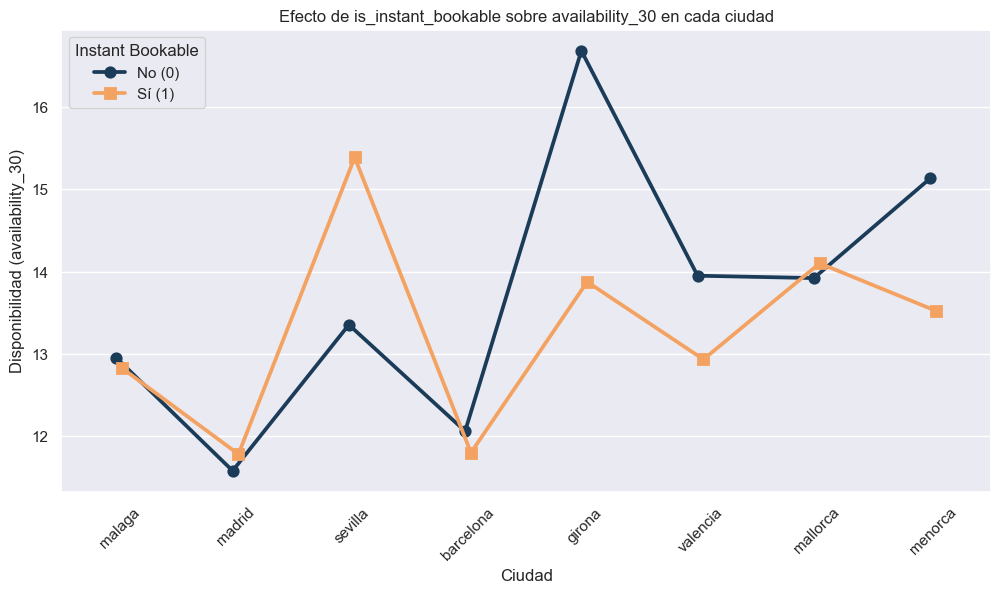

In [ ]:

# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de puntos sin barras de error
ax = sns.pointplot(
    data=df, 
    x="city", 
    y="availability_30", 
    hue="is_instant_bookable", 
    errorbar=None,  # No mostrar errores (IC o SD)
    dodge=True, 
    markers=["o", "s"],
    palette=colores_seleccionados  # Definir colores manualmente
)

# Personalizar etiquetas de la leyenda con colores
legend_labels = ["No (0)", "Sí (1)"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title="Instant Bookable", loc="upper left")

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (availability_30)")
plt.title("Efecto de is_instant_bookable sobre availability_30 en cada ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

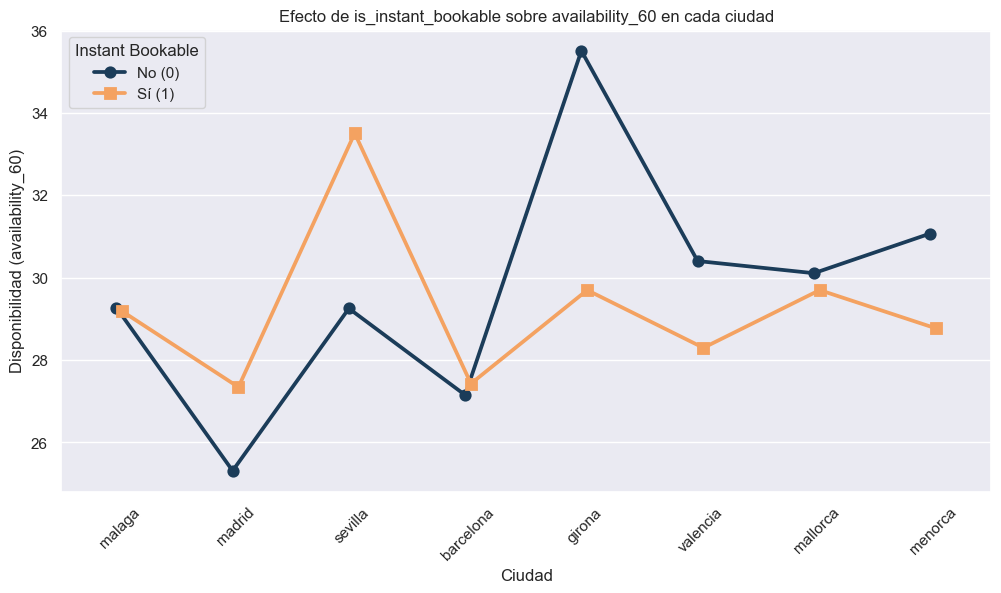

In [ ]:

# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de puntos sin barras de error
ax = sns.pointplot(
    data=df, 
    x="city", 
    y="availability_60", 
    hue="is_instant_bookable", 
    errorbar=None,  # No mostrar errores (IC o SD)
    dodge=True, 
    markers=["o", "s"],
    palette=colores_seleccionados
)

# Personalizar etiquetas de la leyenda con colores
legend_labels = ["No (0)", "Sí (1)"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title="Instant Bookable", loc="upper left")

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (availability_60)")
plt.title("Efecto de is_instant_bookable sobre availability_60 en cada ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

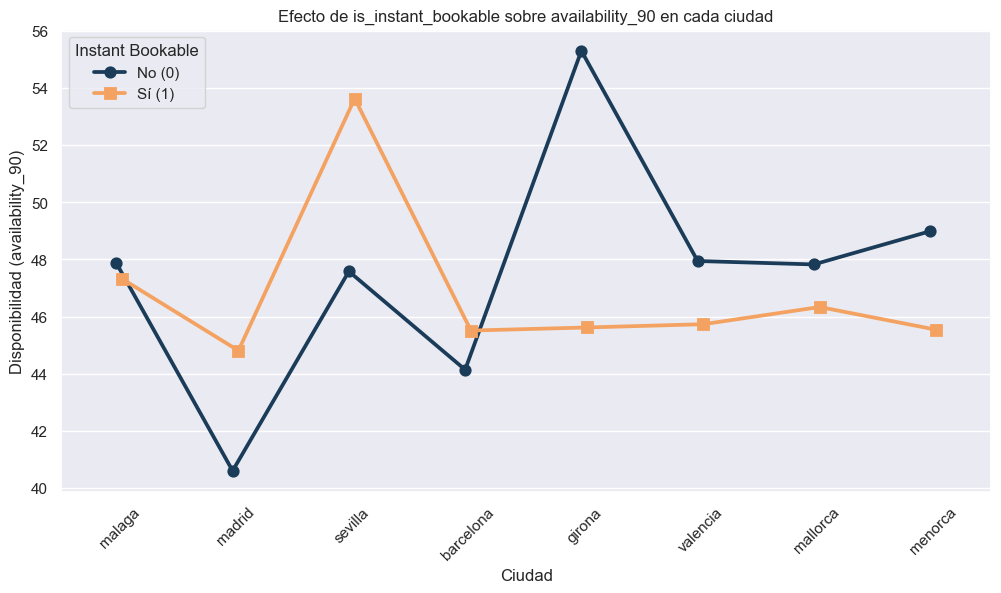

In [ ]:

# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de puntos sin barras de error
ax = sns.pointplot(
    data=df, 
    x="city", 
    y="availability_90", 
    hue="is_instant_bookable", 
    errorbar=None,  # No mostrar errores (IC o SD)
    dodge=True, 
    markers=["o", "s"],
    palette=colores_seleccionados
)

# Personalizar etiquetas de la leyenda con colores
legend_labels = ["No (0)", "Sí (1)"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title="Instant Bookable", loc="upper left")

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (availability_90)")
plt.title("Efecto de is_instant_bookable sobre availability_90 en cada ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

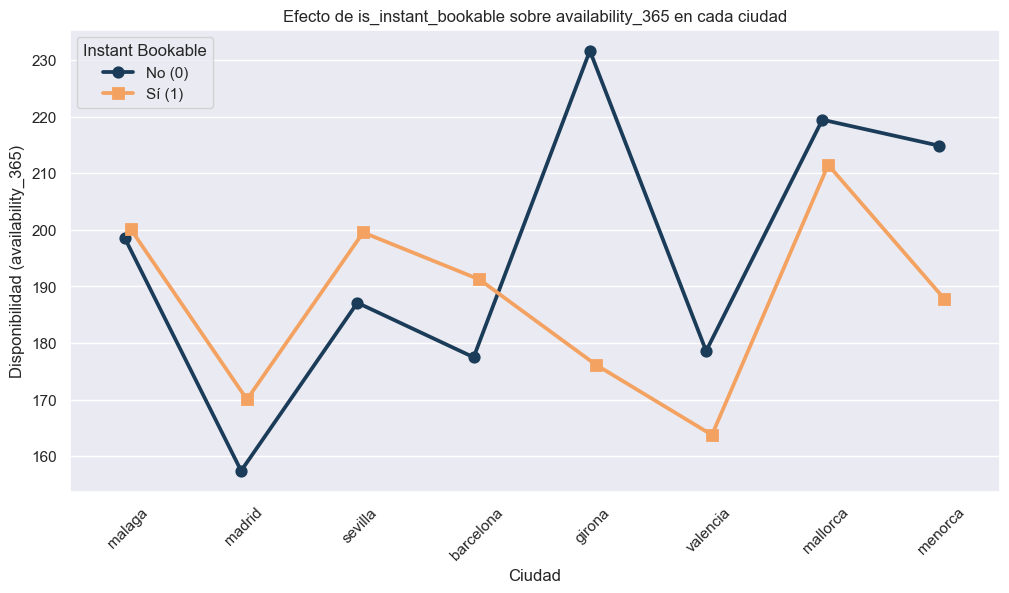

In [ ]:

# Seleccionar dos colores relevantes de la paleta
colores_seleccionados = [paleta[0], paleta[6]]  # Azul profundo y verde bosque

# Crear la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de puntos sin barras de error
ax = sns.pointplot(
    data=df, 
    x="city", 
    y="availability_365", 
    hue="is_instant_bookable", 
    errorbar=None,  # No mostrar errores (IC o SD)
    dodge=True, 
    markers=["o", "s"],
    palette=colores_seleccionados
)

# Personalizar etiquetas de la leyenda con colores
legend_labels = ["No (0)", "Sí (1)"]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title="Instant Bookable", loc="upper left")

# Personalizar el gráfico
plt.xlabel("Ciudad")
plt.ylabel("Disponibilidad (availability_365)")
plt.title("Efecto de is_instant_bookable sobre availability_365 en cada ciudad")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()

C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\3620487573.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotar etiquetas
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\3620487573.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotar etiquetas
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\3620487573.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotar etiquetas
C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\3620487573.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

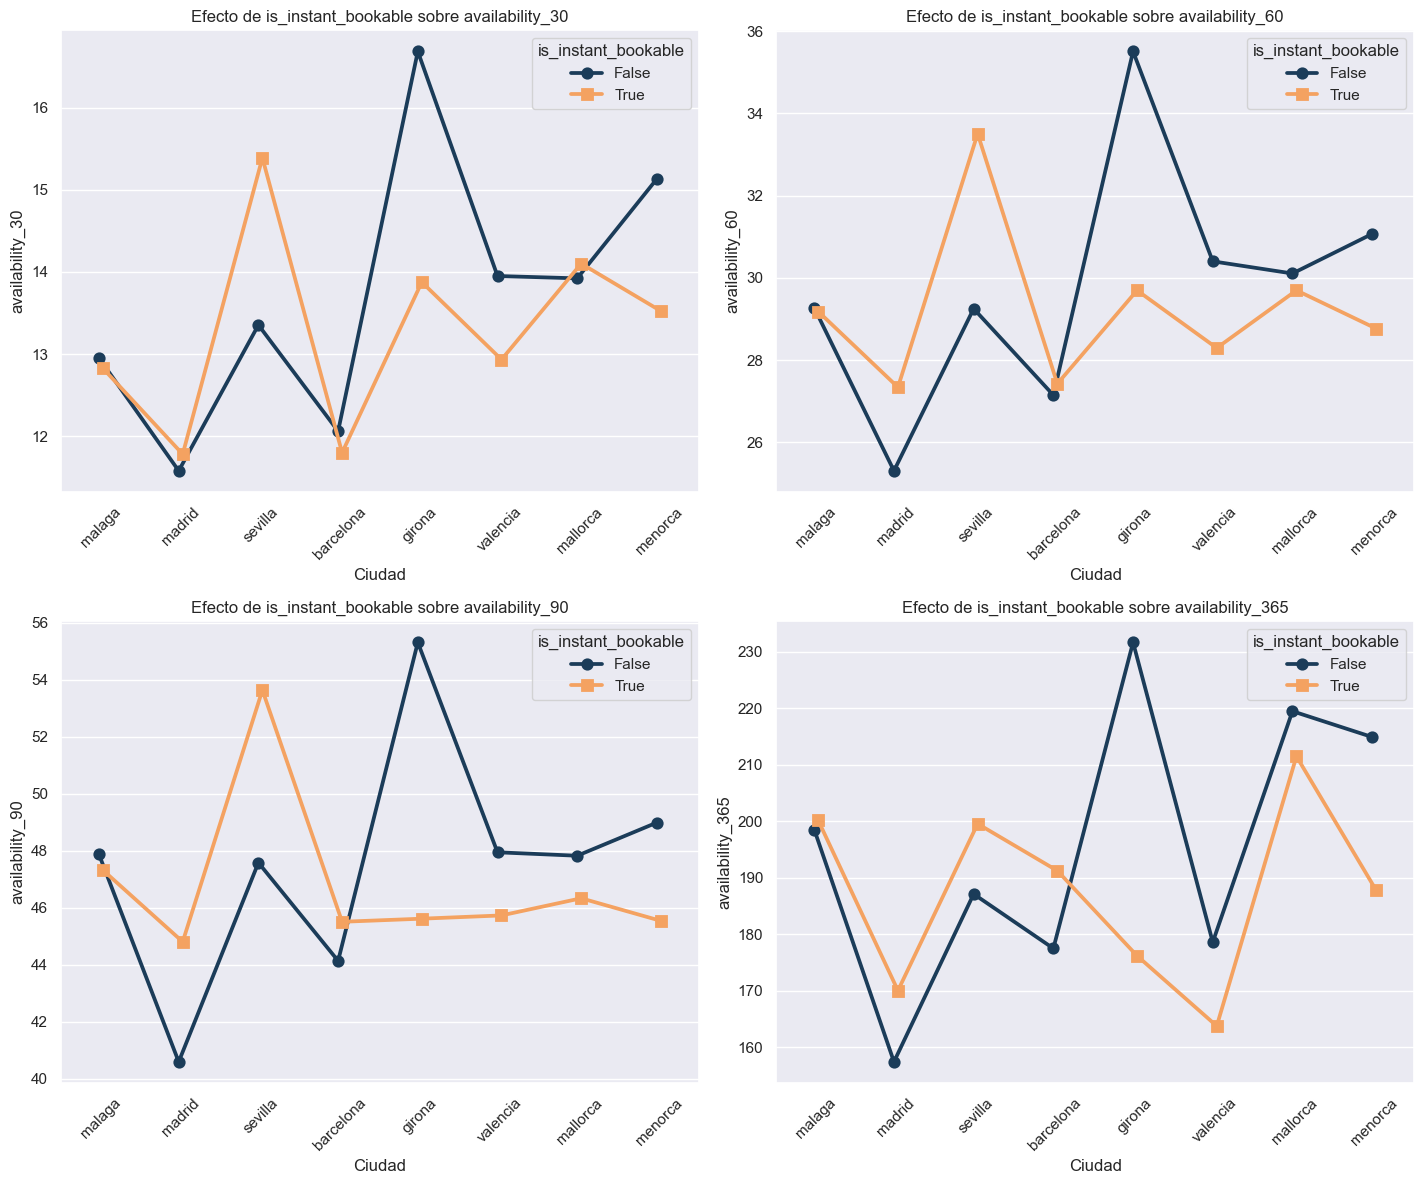

In [ ]:
# Crear figura y ejes en un diseño de 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Iterar sobre cada variable y graficar en los ejes correspondientes
for ax, availability in zip(axes.flat, availability_cols):
    sns.pointplot(
        data=df,
        x="city",
        y=availability,
        hue="is_instant_bookable",
        errorbar=None,  # Sin barras de error
        dodge=True,
        markers=["o", "s"],
        # palette=["blue", "orange"],
        palette=["#1B3C59", "#F4A261"],
        ax=ax
    )
    
    # Personalización de cada gráfico
    ax.set_xlabel("Ciudad")
    ax.set_ylabel(f"{availability}")
    ax.set_title(f"Efecto de is_instant_bookable sobre {availability}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotar etiquetas

# Ajustar la leyenda para que no se repita en cada gráfico
handles, labels = axes[0, 0].get_legend_handles_labels()

# Ajustar el diseño de la figura
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajustar espacio dejando margen para la leyenda

# Mostrar la figura
plt.show()

# Disponibilidad media por mes según tipo de reserva

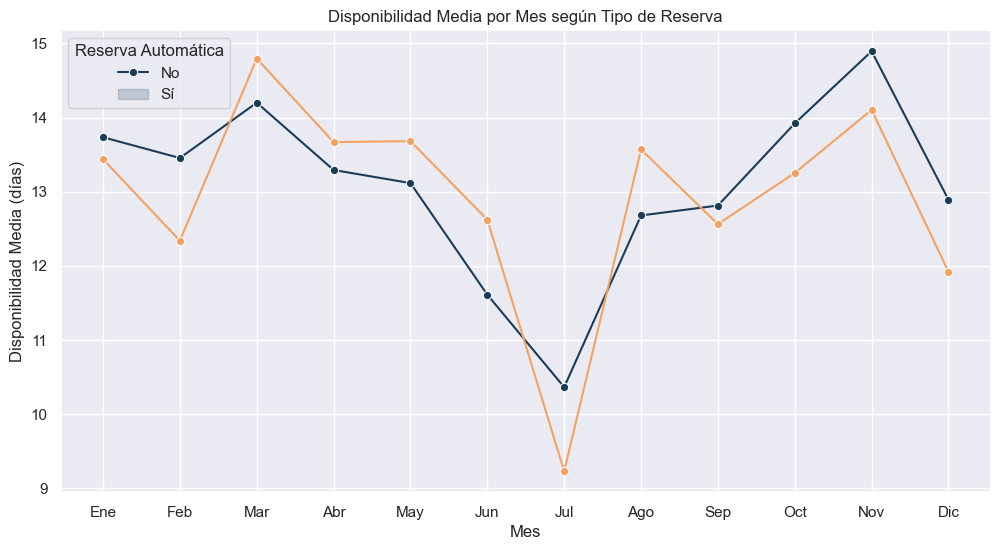

In [ ]:
# Convertir la columna de fecha a tipo datetime si no lo está
df['insert_date'] = pd.to_datetime(df['insert_date'])

# Extraer el mes para agrupar
# (Si no hay una columna de fechas, habría que calcularla desde otro campo)
df['month'] = df['insert_date'].dt.month

# Calcular disponibilidad media por mes y tipo de reserva
df_monthly = df.groupby(['month', 'is_instant_bookable'])['availability_30'].mean().reset_index()

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='month', y='availability_30', hue='is_instant_bookable', marker='o', palette=['#1B3C59', '#F4A261'])

# Personalizar
plt.xlabel('Mes')
plt.ylabel('Disponibilidad Media (días)')
plt.title('Disponibilidad Media por Mes según Tipo de Reserva')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Reserva Automática', labels=['No', 'Sí'])
plt.grid(True)
plt.show()



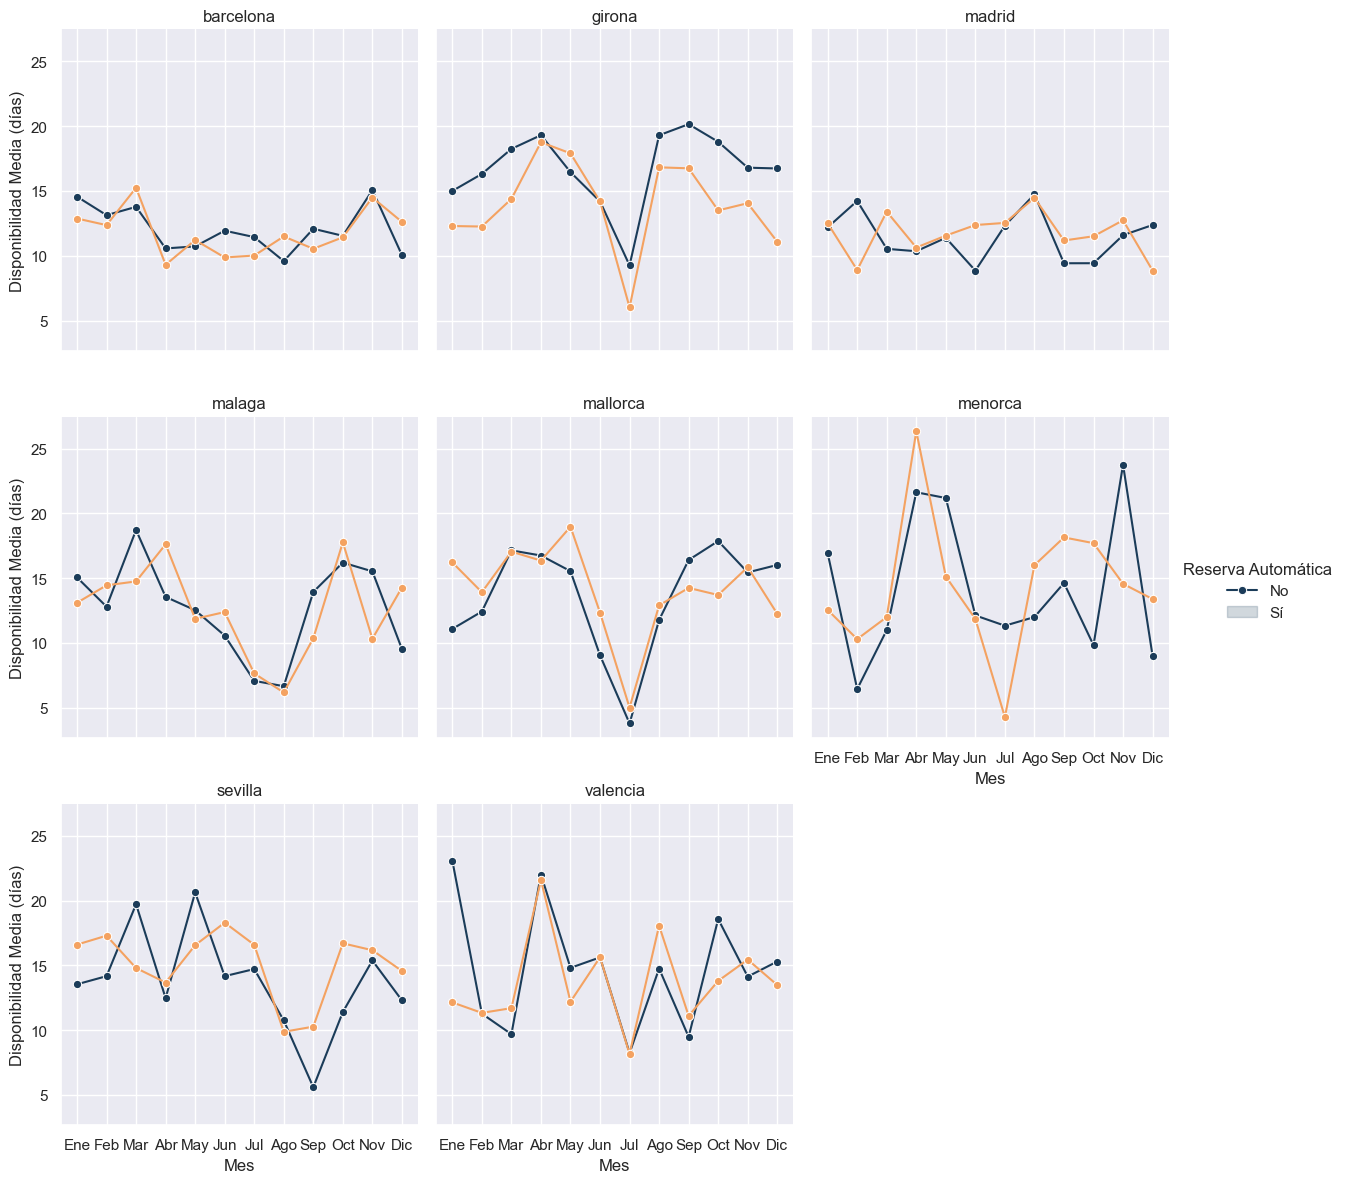

In [ ]:
# Convertir la columna de fecha a tipo datetime si no lo está
df['insert_date'] = pd.to_datetime(df['insert_date'])

# Extraer el mes para agrupar
df['month'] = df['insert_date'].dt.month

# Calcular disponibilidad media por mes, tipo de reserva y ciudad
df_monthly_city = df.groupby(['city', 'month', 'is_instant_bookable'])['availability_30'].mean().reset_index()

# Crear la visualización con FacetGrid (un gráfico por ciudad)
g = sns.FacetGrid(df_monthly_city, col="city", col_wrap=3, sharey=True, height=4)
g.map_dataframe(sns.lineplot, x='month', y='availability_30', hue='is_instant_bookable', marker='o', palette=['#1B3C59', '#F4A261'])

# Ajustes del gráfico
g.set_axis_labels("Mes", "Disponibilidad Media (días)")
g.set_titles(col_template="{col_name}")
g.set(xticks=range(1, 13), xticklabels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
g.add_legend(title='Reserva Automática', labels=['No', 'Sí'])

plt.show()


C:\Users\jodri\AppData\Local\Temp\ipykernel_31464\613942497.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_extremos, x="availability_30", y="price", palette=["#E63946", "#457B9D"])


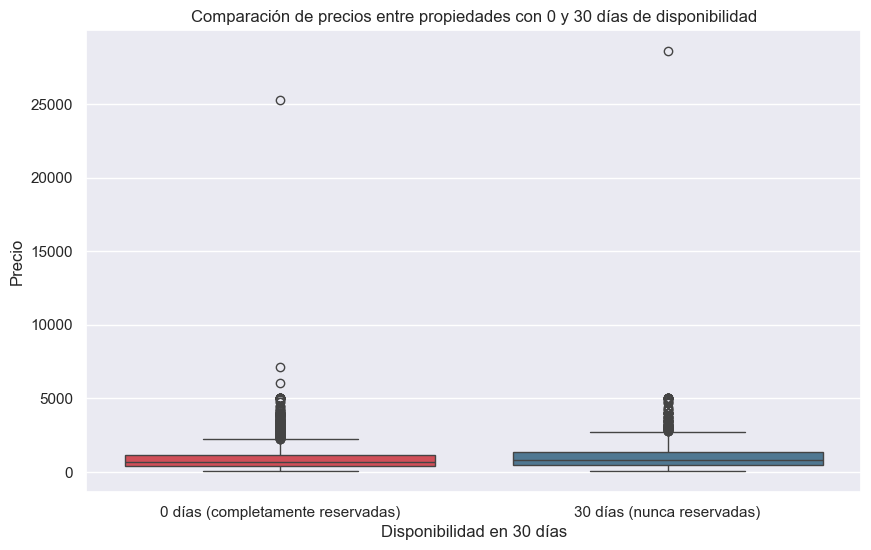

In [ ]:
# Filtrar propiedades con disponibilidad extrema
df_extremos = df[df["availability_30"].isin([0, 30])]

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_extremos, x="availability_30", y="price", palette=["#E63946", "#457B9D"])
plt.title("Comparación de precios entre propiedades con 0 y 30 días de disponibilidad")
plt.xlabel("Disponibilidad en 30 días")
plt.ylabel("Precio")
plt.xticks([0, 1], ["0 días (completamente reservadas)", "30 días (nunca reservadas)"])
plt.show()


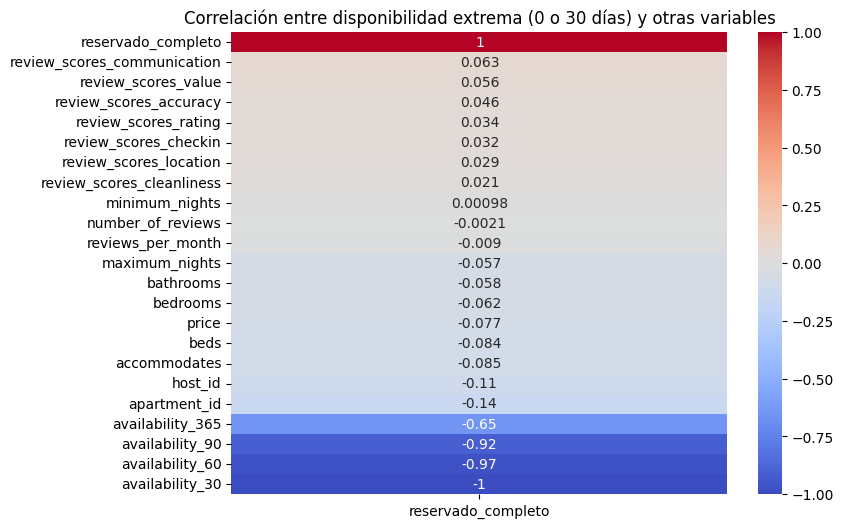

In [ ]:
# Filtrar solo propiedades con disponibilidad extrema
df_extremos = df[df["availability_30"].isin([0, 30])].copy()

# Crear una variable binaria (0 = nunca disponible, 1 = completamente reservado)
df_extremos["reservado_completo"] = df_extremos["availability_30"].apply(lambda x: 1 if x == 0 else 0)

# Seleccionar solo variables numéricas
df_numerico = df_extremos.select_dtypes(include=["number"])

# Calcular la correlación con la variable objetivo
correlaciones = df_numerico.corr()["reservado_completo"].sort_values(ascending=False)

# Visualizar el mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones.to_frame(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlación entre disponibilidad extrema (0 o 30 días) y otras variables")
plt.show()

# KPIS

In [ ]:
# Asegurar que la fecha está en formato datetime
df['insert_date'] = pd.to_datetime(df['insert_date'])

# Extraer el mes y año
df['year_month'] = df['insert_date'].dt.to_period('M')

# Calcular disponibilidad promedio mensual
df_monthly = df.groupby('year_month')['availability_30'].mean().reset_index()

# Calcular la tasa de ocupación mensual
df_monthly['tasa_ocupacion'] = (1 - df_monthly['availability_30'] / 30) * 100

# Obtener la tasa de ocupación del mes actual y de la semana pasada
tasa_actual = df_monthly['tasa_ocupacion'].iloc[-1]
tasa_semana_pasada = 56.53  # Dato proporcionado

# Determinar el color de la flecha
color_flecha = 'green' if tasa_actual > tasa_semana_pasada else 'red'
simbolo_flecha = '▲' if tasa_actual > tasa_semana_pasada else '▼'

# Calcular tasa de ocupación por ciudad
df_city = df.groupby('city')['availability_30'].mean().reset_index()
df_city['tasa_ocupacion'] = (1 - df_city['availability_30'] / 30) * 100

# Obtener la ciudad con mayor ocupación
ciudad_max_ocupacion = df_city.loc[df_city['tasa_ocupacion'].idxmax()]

# Mostrar los resultados
print(f"📊 **Tasa de ocupación mensual:** {tasa_actual:.2f}% {simbolo_flecha} (vs. {tasa_semana_pasada}%)")
print(f"🏙️ **Ciudad con mayor ocupación:** {ciudad_max_ocupacion['city']} ({ciudad_max_ocupacion['tasa_ocupacion']:.2f}%)")


📊 **Tasa de ocupación mensual:** 53.57% ▼ (vs. 56.53%)
🏙️ **Ciudad con mayor ocupación:** madrid (61.01%)


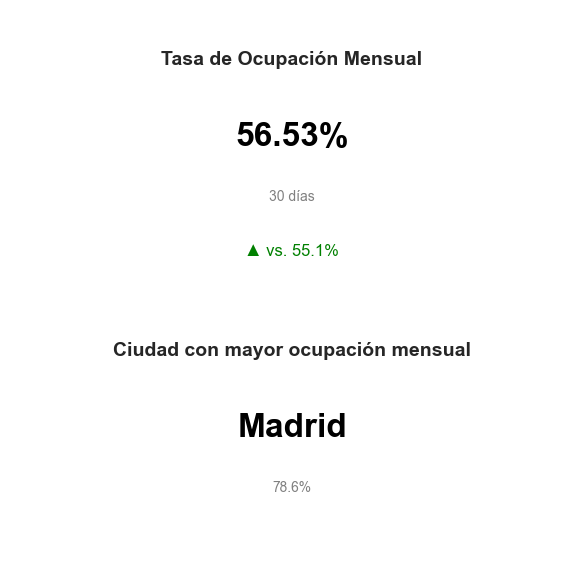

In [ ]:
# Datos ficticios de ejemplo
tasa_ocupacion_actual = 56.53
tasa_ocupacion_anterior = 55.10  # Valor de la semana pasada

ciudad_mayor_ocupacion = "Madrid"
ocupacion_ciudad_max = 78.6  # Tasa de ocupación en la ciudad con mayor ocupación

# Determinar el color y la flecha según la variación de la tasa de ocupación
color_flecha = 'green' if tasa_ocupacion_actual > tasa_ocupacion_anterior else 'red'
simbolo_flecha = '▲' if tasa_ocupacion_actual > tasa_ocupacion_anterior else '▼'

# Crear la figura
fig, ax = plt.subplots(2, 1, figsize=(6, 6))

# Métrica 1: Tasa de Ocupación Mensual
ax[0].text(0.5, 0.8, "Tasa de Ocupación Mensual", ha='center', fontsize=14, fontweight='bold')
ax[0].text(0.5, 0.5, f"{tasa_ocupacion_actual}%", ha='center', fontsize=24, fontweight='bold', color='black')
ax[0].text(0.5, 0.3, "30 días", ha='center', fontsize=10, color='gray')
ax[0].text(0.5, 0.1, f"{simbolo_flecha} vs. {tasa_ocupacion_anterior}%", ha='center', fontsize=12, color=color_flecha)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_frame_on(False)
ax[0].patch.set_facecolor('#A8DADC')

# Métrica 2: Ciudad con mayor ocupación
ax[1].text(0.5, 0.8, "Ciudad con mayor ocupación mensual", ha='center', fontsize=14, fontweight='bold')
ax[1].text(0.5, 0.5, ciudad_mayor_ocupacion, ha='center', fontsize=24, fontweight='bold', color='black')
ax[1].text(0.5, 0.3, f"{ocupacion_ciudad_max}%", ha='center', fontsize=10, color='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_frame_on(False)
ax[1].patch.set_facecolor('#A8DADC')

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [ ]:
# Suponiendo que tienes un DataFrame con la columna 'availability_30'

# Calcular los días ocupados como (30 - availability_30)
df['dias_ocupados'] = 30 - df['availability_30']

# Calcular la tasa de ocupación como (días ocupados / 30) * 100
tasa_ocupacion_mensual = (df['dias_ocupados'].sum() / (len(df) * 30)) * 100

print(f"Tasa de ocupación mensual: {tasa_ocupacion_mensual:.2f}%")


Tasa de ocupación mensual: 56.62%
